In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import time

import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from tqdm.notebook import tqdm
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
regions = ["BLA", "VTA", "CPU", "HIP", "PFC", "NAC"]



['BLA', 'VTA', 'CPU', 'HIP', 'PFC', 'NAC']


Text(0.5, 0.01, 'Soft Threshold (power)')

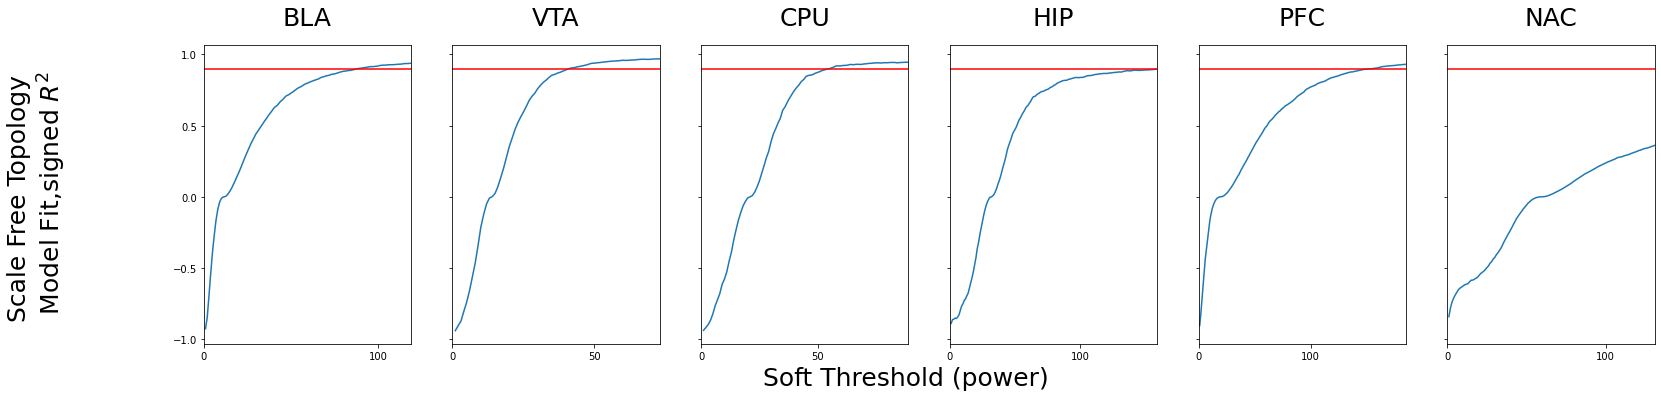

In [3]:
col = len(regions)
row = 1
fig, axes = plt.subplots(row, col, sharey=True)
fig.set_size_inches((26, 5.5))
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)
print(regions)
for i, region in enumerate(regions):
    
    df = pd.read_csv("./%s_sft.csv" % region, index_col = 0)
    slope_arr = []
    for slope in df["slope"]:
        slope_arr.append(-np.sign(slope))
    
    axes[i].plot(df["Power"], slope_arr*df["SFT.R.sq"])
    axes[i].hlines(y=0.9, xmin=0.0, xmax=df["Power"].values[-1], color='r')
    axes[i].set_xlim(0, df["Power"].values[-1])
    axes[i].set_title("%s" % region, fontsize = 25, pad=20)

# axes[0].set_xlabel("Soft Threshold (power)", fontsize = 25)
# axes[0].set_ylabel(r"Scale Free Topology" + "\n" + r" Model Fit,signed $R^{2}$", fontsize = 25)
fig.supylabel(r"Scale Free Topology" + "\n" + r" Model Fit,signed $R^{2}$", fontsize = 25)
fig.supxlabel("Soft Threshold (power)", fontsize = 25)


In [29]:
melted_df = pd.read_csv("df_module_fixed_info_reordered.csv", index_col = 0) 
pd.set_option('display.max_rows', None)
melted_df[melted_df["Region"] == "NAC"].sort_values(by=['Corr'])

,Region,Mname,Corr,Pvalue,GOterm,Symbols,GOPvalue,OddsRatio,EnrichmentRatio
43,NAC,MEthistle2,-0.622436,0.010024,glycosyl compound biosynthetic process,"['C1d: C1D nuclear receptor co-repressor', 'Ca...",0.002003,13.519860,11.825253
46,NAC,MElightslateblue,-0.604041,0.013211,polysaccharide biosynthetic process,['Baz1b: bromodomain adjacent to zinc finger d...,0.000533,21.524074,18.761218
42,NAC,MEblue2,-0.602363,0.013537,neuroepithelial cell differentiation,"['Vps50: VPS50 EARP/GARPII complex subunit', '...",0.002400,12.398788,11.199298
40,NAC,MEdarkviolet,-0.585762,0.017115,deoxyribonucleoside metabolic process,"['Spa17: sperm autoantigenic protein 17', 'Lam...",0.000062,448.153846,144.530864
48,NAC,MEthistle4,-0.581756,0.018079,toxin transport,['Hnrnpa2b1: heterogeneous nuclear ribonucleop...,0.000188,31.451351,26.606818
38,NAC,MEdarkolivegreen4,-0.567709,0.021797,adhesion of symbiont to host,"['Dlg3: discs large MAGUK scaffold protein 3',...",0.000032,67.314672,45.611688
39,NAC,MEivory,-0.565604,0.022401,miRNA loading onto RISC involved in gene silen...,['Bcl11a: B cell CLL/lymphoma 11A (zinc finger...,0.000009,117.831081,65.159555
41,NAC,MEorange,-0.560808,0.023827,negative regulation of smooth muscle cell prol...,"['S100a4: S100 calcium binding protein A4', 'B...",0.001579,14.573942,12.912132
45,NAC,MEdeeppink,-0.556064,0.025304,positive regulation of inositol phosphate bios...,['Gabra2: gamma-aminobutyric acid (GABA) A rec...,0.000050,62.073214,38.175000
44,NAC,MEorangered3,-0.545633,0.028799,regulation of mRNA polyadenylation,"['Prkar2b: protein kinase, cAMP dependent regu...",0.001162,47.182186,39.023333


# Module-trait alignment (Fig. 1a.)

In [5]:
from sklearn.metrics import r2_score

def plot_module_scatter(Mnames):
    region = "NAC"
    fig = plt.figure(figsize = (9, 9))
    x = []
    y = []
    leg = []
    for Mname in Mnames:
        print(region)
        df_EG0_tem = pd.read_csv("Results/temporal/%s-MEs0.csv" % region, index_col = 0)
        df_EG0_sam = pd.read_csv("Results/sample/%s-MEs0.csv" % region,index_col = 0)

        ordered_AI_index_list = sorted(AI_index_hash.items(), key = lambda item: item[1])
        ordered_AI_index_hash = dict(ordered_AI_index_list)

    #     AI_index = [float(i.split("..")[-1][:-1]) for i in df_EG0_sam.index]
        AI_index = list(ordered_AI_index_hash.values())

    #     df_EG0_sam.index = [i.split("..")[-3] + "_" + i.split("..")[-4] for i in df_EG0_sam[Mname].index]
        df_EG0_sam= df_EG0_sam.reindex([i for i in ordered_AI_index_hash.keys()])
    #     df_EG0_sam.reindex([i.split("..")[-3] + "_" + i.split("..")[-4] for i in ordered_AI_index_hash.keys()])
        plt.scatter(df_EG0_sam[Mname].values, AI_index , linewidth = 4, label = Mname[2:])
        x.extend(df_EG0_sam[Mname].values)
        y.extend(AI_index)
    #     plt.plot(df_EG0_sam[Mname], linewidth = 4, label = Mname)
    #     ax1.set_xticks(["" for ai in AI_index])
        plt.ylim(-0.5, 0.5)

    # ax2.plot(AI_index, color = "black", linewidth = 4, label = "AI")
    # ax2.set_ylim(-0.5, 0.5)
    # ax1.set_xlabel('X data')

    plt.xlabel('Eigen Gene level', fontsize = 25)
    plt.ylabel('Addiction Index', fontsize = 25)
    # plt.plot(AI_index, color = "black", linewidth = 4)
    # plt.title("Eigen Gene comparison in %s" % region, fontsize = 50)
    lines = []
    labels = []

    for ax in fig.axes:
        axLine, axLabel = ax.get_legend_handles_labels()
        lines.extend(axLine)
        labels.extend([ "Module: " + lb.capitalize() for lb in axLabel ])


    plt.legend(lines, labels,loc = 'upper right', fontsize = 16)

    fit_line = np.polyfit(x, y, 1)
    x_minmax = np.array([min(x), max(x)]) # x축 최소값, 최대값
    fit_y = x_minmax * fit_line[0] + fit_line[1] # x축 최소, 최대값을 회귀식에 대입한 값
#     plt.scatter(x, y, color = 'r', s = 20)
    plt.plot(x_minmax, fit_y, color = 'black') 
    est_y = np.array(x) * fit_line[0] + fit_line[1]
    r2 = r2_score(y, est_y)
    plt.text(0.,-0.1, '$R^2$ = %.4f'%r2, size = 16)
    plt.yticks(size=20)
    plt.xticks(size=20)

    # ax1.legend(fontsize = 50)
    # ax2.legend(fontsize = 50)
    plt.show()

In [6]:
AI_index_hash = {}
region ="NAC"
df_EG0_sam = pd.read_csv("Results/sample/%s-MEs0.csv" % region,index_col = 0)

for ind in df_EG0_sam.index:
    AI_index_hash[ind ] =  float(ind.split("..")[-1][:-1])

NAC
NAC
NAC
NAC


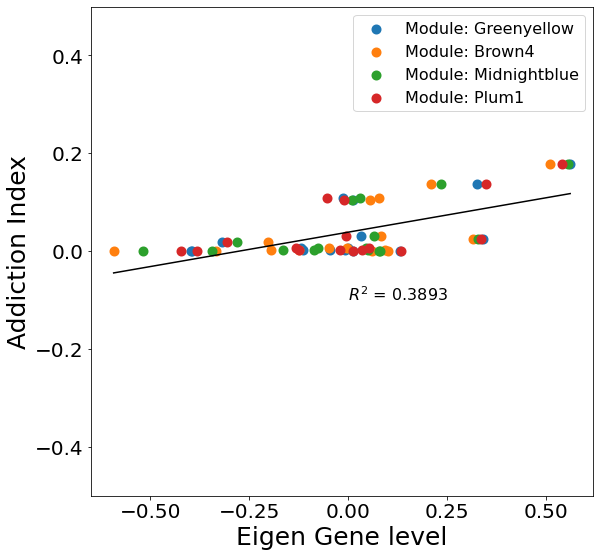

NAC
NAC
NAC
NAC


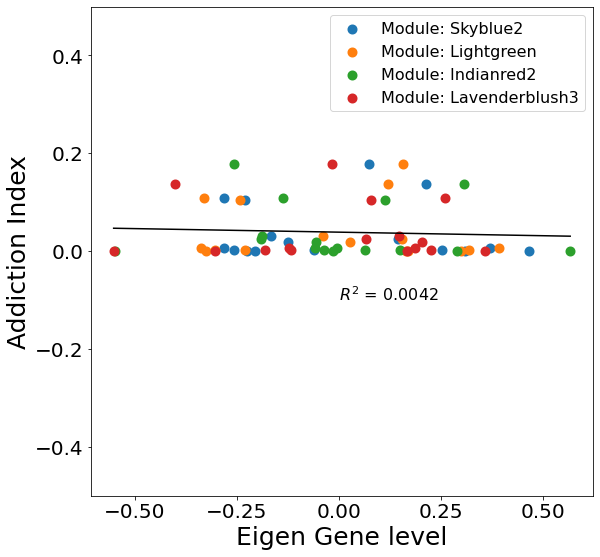

NAC
NAC
NAC
NAC
NAC


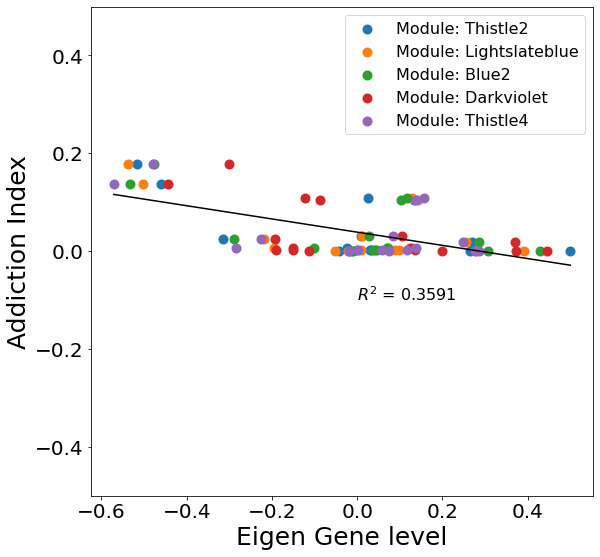

In [7]:
# Mnames = ["MEgreenyellow", "MElightpink4"]
Mnames = ["MEgreenyellow", "MEbrown4", "MEmidnightblue", "MEplum1"]
plot_module_scatter(Mnames)
Mnames = ["MEskyblue2", "MElightgreen", "MEindianred2", "MElavenderblush3"]
plot_module_scatter(Mnames)
Mnames = ["MEthistle2", "MElightslateblue", "MEblue2", "MEdarkviolet", "MEthistle4"]
plot_module_scatter(Mnames)

# Module-trait alignment (Fig. S5.)

In [8]:
def plot_module_EG_AI(Mnames):
    plt.rcParams['font.size'] = 20

    # Mnames = ["MEgreenyellow", "MElightpink4"]
    region = "NAC"
    # plt.figure(figsize = (18, 18))
    fig, ax1 = plt.subplots(figsize = (9, 9))
    # fig, ax1 = plt.subplots(figsize = (18, 18))

    ax2 = ax1.twinx()
    leg = []
    for Mname in Mnames:
        print(region)
        df_EG0_tem = pd.read_csv("Results/temporal/%s-MEs0.csv" % region, index_col = 0)
        df_EG0_sam = pd.read_csv("Results/sample/%s-MEs0.csv" % region,index_col = 0)

        ordered_AI_index_list = sorted(AI_index_hash.items(), key = lambda item: item[1])
        ordered_AI_index_hash = dict(ordered_AI_index_list)

    #     AI_index = [float(i.split("..")[-1][:-1]) for i in df_EG0_sam.index]
        AI_index = list(ordered_AI_index_hash.values())

    #     df_EG0_sam.index = [i.split("..")[-3] + "_" + i.split("..")[-4] for i in df_EG0_sam[Mname].index]
        df_EG0_sam= df_EG0_sam.reindex([i for i in ordered_AI_index_hash.keys()])
    #     df_EG0_sam.reindex([i.split("..")[-3] + "_" + i.split("..")[-4] for i in ordered_AI_index_hash.keys()])

#         print(df_EG0_sam.index)
        ax1.plot(df_EG0_sam[Mname], linewidth = 4, label = Mname[2:])
#         ax1.yticks(size = 20)

    #     plt.plot(df_EG0_sam[Mname], linewidth = 4, label = Mname)
        ax1.set_xticks(["" for ai in AI_index])
#         ax1.set_ytikcs(size=20)
        ax1.set_ylim(-1.5, 1.5)

    ax2.plot(AI_index, color = "black", linewidth = 4, label = "AI")
#     ax2.set_ytikcs(fontsize=25)
    ax2.set_ylim(-0.5, 0.5)
    # ax1.set_xlabel('X data')

    ax1.set_ylabel('Eigen Gene level', fontsize = 25)
    ax2.set_ylabel('Addiction Index', fontsize = 25)
    # plt.plot(AI_index, color = "black", linewidth = 4)
    # plt.title("Eigen Gene comparison in %s" % region, fontsize = 50)
    lines = []
    labels = []

    for ax in fig.axes:
        axLine, axLabel = ax.get_legend_handles_labels()
        lines.extend(axLine)
        labels.extend([ "Module: " + lb.capitalize() for lb in axLabel ])

    labels[-1] = "Addiction Index"
    ax1.legend(lines, labels,loc = 'upper right', fontsize = 25)
#     plt.yticks(size = 20)

    # ax1.legend(fontsize = 50)
    # ax2.legend(fontsize = 50)
    plt.show()

NAC
NAC
NAC
NAC


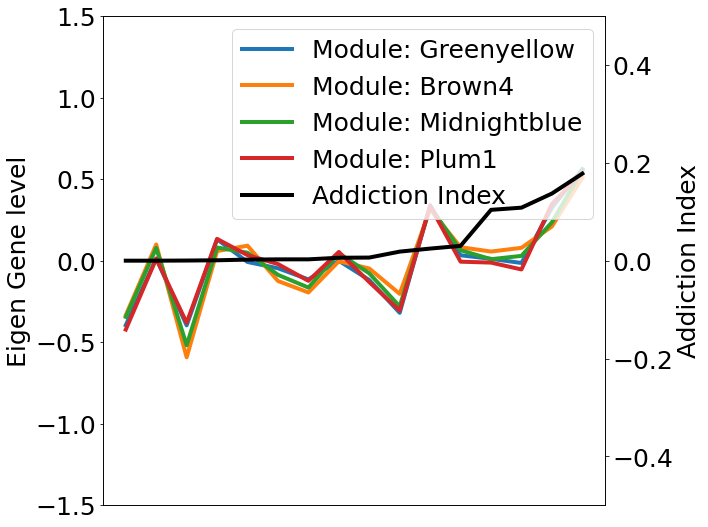

NAC
NAC
NAC
NAC


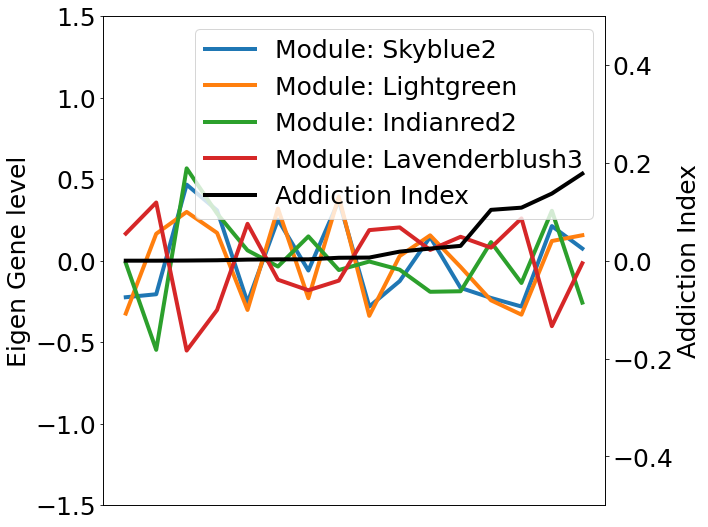

NAC
NAC
NAC
NAC
NAC


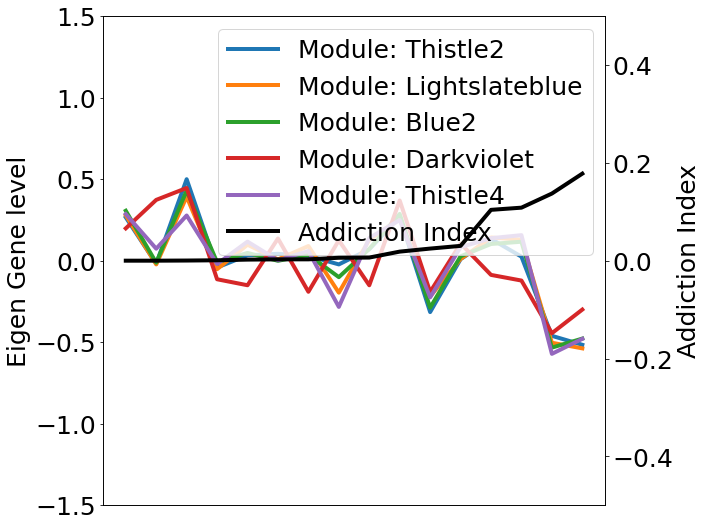

In [9]:
# Mnames = ["MEgreenyellow", "MElightpink4"]
Mnames = ["MEgreenyellow", "MEbrown4", "MEmidnightblue", "MEplum1"]
plot_module_EG_AI(Mnames)
Mnames = ["MEskyblue2", "MElightgreen", "MEindianred2", "MElavenderblush3"]
plot_module_EG_AI(Mnames)
Mnames = ["MEthistle2", "MElightslateblue", "MEblue2", "MEdarkviolet", "MEthistle4"]
plot_module_EG_AI(Mnames)

# Module-trait alignment (Fig. 1b.)

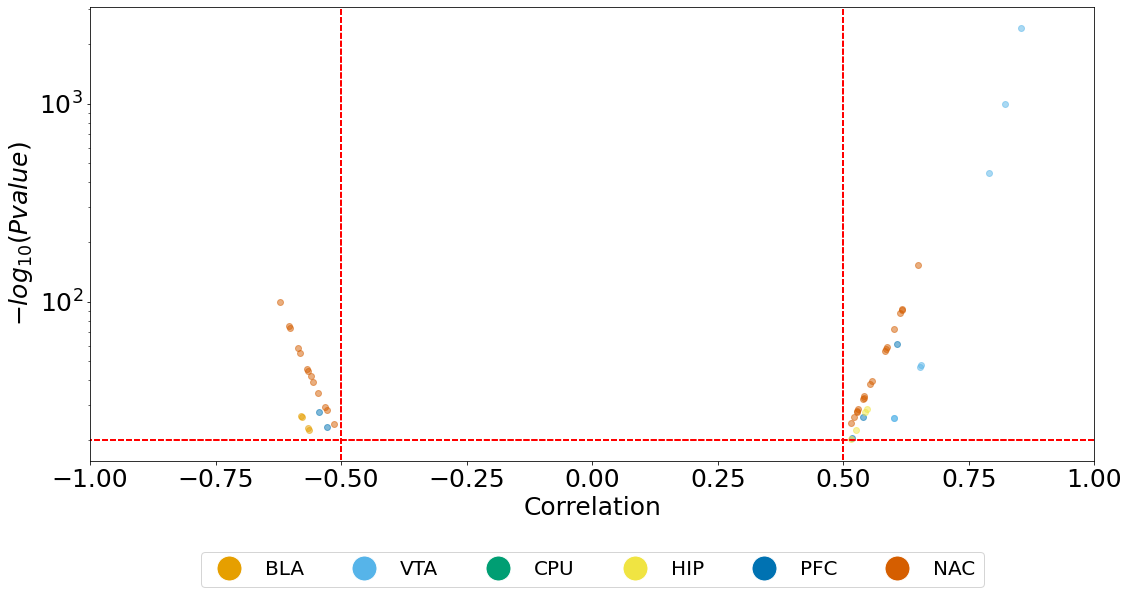

In [30]:
tmp_dfs = []
regions = ["PFC", "CPU", "NAC", "HIP", "VTA", "BLA"]
regional_color_hash = {"BLA": (230 / 255, 159 / 255, 0), "VTA": (86 / 255, 180 / 255, 233 / 255), "CPU": (0, 158 / 255, 115 / 255), "HIP": (240 / 255, 228 / 255, 66 / 255), "PFC": (0, 114 / 255, 178 / 255), "NAC": (213 / 255, 94 / 255, 0)}

import math

plt.figure(figsize=(18, 10))
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)
for region in regions:

    heatmap_df = melted_df[melted_df["Region"] == region]#[(abs(melted_df["Corr"]) > 0.5) & (melted_df["Pvalue"] < 0.05) & (melted_df["Region"] == region)]
    plt.yscale("log")
    corr_df = pd.read_csv("Results/%s-moduleTraitCor-ori.csv" % region, index_col = 0)
    Pvalue_df = pd.read_csv("Results/%s-moduleTraitPvalue-ori.csv" % region, index_col = 0)
    
    log_c = []
    for corr in heatmap_df["Corr"]:
        log_c.append(math.log(abs(corr), 10))
        
    log_p = []
    for p in heatmap_df["Pvalue"]:
        log_p.append(-math.log(p, 10))
    
    df_sign = heatmap_df[(abs(heatmap_df["Corr"]) > 0.5) & (heatmap_df["Pvalue"] < 0.05)]
    df_unsign = heatmap_df[(abs(heatmap_df["Corr"]) < 0.5) & (heatmap_df["Pvalue"] > 0.05)]
    
#     plt.scatter(df_sign["Corr"], [-math.log(pval, 10) for pval in df_sign["Pvalue"]],
#                 alpha = 0.5, label = region, color = regional_color_hash[region]
#                )
#     plt.scatter(df_unsign["Corr"], [-math.log(pval, 10) for pval in df_unsign["Pvalue"]],
#                 alpha = 0.05, label = region, color = regional_color_hash[region]
#                )

    plt.scatter(df_sign["Corr"], 1./df_sign["Pvalue"],
                alpha = 0.5, label = region, color = regional_color_hash[region]
               )

    plt.scatter(df_unsign["Corr"], 1./df_unsign["Pvalue"],
                alpha = 0.05, label = region, color = regional_color_hash[region]
               )
    
#     plt.scatter(heatmap_df["Corr"],log_p,
#                 alpha = 1, label = region, color = regional_color_hash[region]
#                )
    
    plt.axhline(1./0.05,xmin=-1,xmax=1, color="r", linestyle='--')
    plt.axvline(0.5,ymin=-1,ymax=4, color="r", linestyle='--')
    plt.axvline(-0.5,ymin=-1,ymax=4, color="r", linestyle='--')
    plt.xlabel("Correlation", fontsize = 25)
    plt.ylabel(r"$-log_{10}(Pvalue)$", fontsize = 25)
    
    plt.xlim(-1, 1)

legend_elems = []
for key in regional_color_hash:
    legend_elems.append(Line2D([0], [0], marker='o', color='w', label=key,
                          markerfacecolor=regional_color_hash[key], markersize=25))

# handles, labels = ax.get_legend_handles_labels()
plt.legend(legend_elems, regional_color_hash.keys(), loc='lower center', ncol = 6, fontsize= 20, bbox_to_anchor=(0.5, -0.3))
plt.subplots_adjust(bottom=0.25)

# plt.title("Module correaltion with trait over brain six regions", fontsize = 30, pad=20)

# Module-trait alignment (Fig. 1c.)

NAC
31
PFC
5
HIP
4
CPU
0
VTA
7
BLA
4


<Figure size 648x648 with 0 Axes>

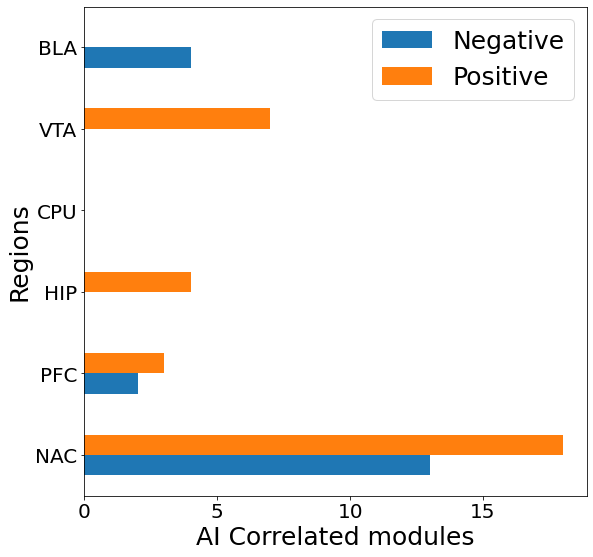

In [11]:
melted_df = pd.read_csv("Integrated_Module_AI_alignmnet.csv", index_col = 0) 
plt.figure(figsize = (9,9))
data = {
    "Positive": [],
    "Negative": []
}

for region in ["NAC", "PFC", "HIP","CPU", "VTA", "BLA"]:
    print(region)
    print(len(melted_df[(melted_df["Region"] == region) & (abs(melted_df["Corr"]) > 0.5) & (melted_df["Pvalue"] < 0.05)]))
    data["Positive"].append(len(melted_df[(melted_df["Region"] == region) & (melted_df["Corr"] > 0.5) & (melted_df["Pvalue"] < 0.05)]))
    data["Negative"].append(len(melted_df[(melted_df["Region"] == region) & (melted_df["Corr"] < -0.5) & (melted_df["Pvalue"] < 0.05)]))

df = pd.DataFrame(data,columns=['Negative','Positive'], index = ["NAC", "PFC", "HIP","CPU", "VTA", "BLA"])
df.plot.barh(figsize = (9,9))

plt.ylabel('Regions', fontsize =25)
plt.xlabel('AI Correlated modules', fontsize =25)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize = 25)

plt.show()

# GO analysis of modules that highly correlatated with Addiction index (Fig. 2.)

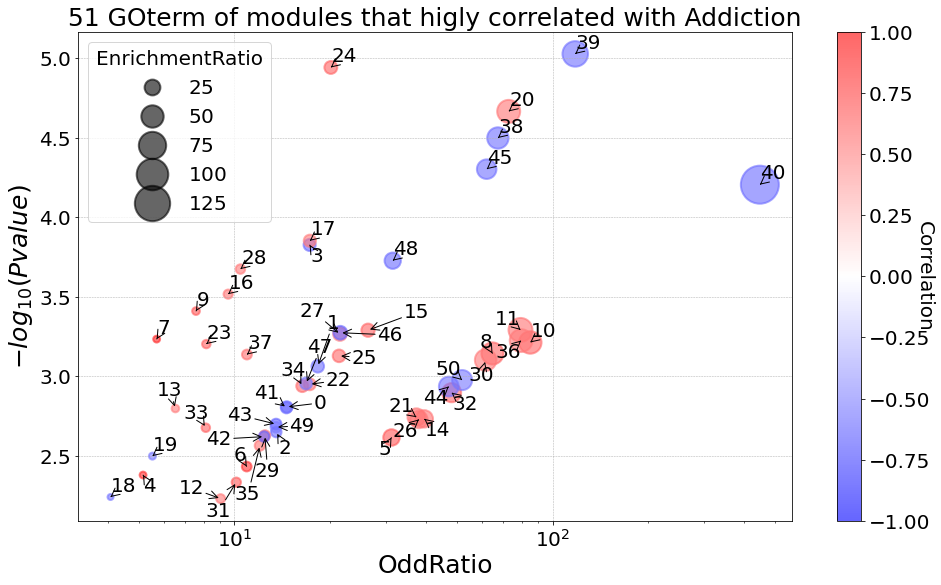

In [12]:
import matplotlib.pyplot as plt
import math
from adjustText import adjust_text

df_module_fixed_info = pd.read_csv("df_module_fixed_info_reordered.csv", index_col = 0)
plt.figure(figsize=(16, 9))
# fig.set_facecolor('white')
# plt.scatter(
#     x = df_module_fixed_info["OddsRatio"], 
#     y = [- math.log10(p) for p in df_module_fixed_info["GOPvalue"]], 
#     s = df_module_fixed_info["EnrichmentRatio"] * 10, 
#     c =  df_module_fixed_info["Corr"], 
#     cmap="bwr",
#     alpha=0.6, 
#     linewidth=2);

sc = plt.scatter(
    x = df_module_fixed_info["OddsRatio"], 
    y = [- math.log10(p) for p in df_module_fixed_info["GOPvalue"]], 
    s = df_module_fixed_info["EnrichmentRatio"] * 10, 
    c =  df_module_fixed_info["Corr"], 
    cmap="bwr",
    alpha=0.6, 
    linewidth=2);
 
# plt.yscale('log')
plt.xlabel("OddRatio", fontsize = 25)
plt.ylabel("$-log_{10}(Pvalue)$", fontsize = 25)
plt.xscale("log")

plt.title(f"51 GOterm of modules that higly correlated with Addiction" , fontsize = 25)
plt.grid(True, which='major', linestyle='--', linewidth=0.5)

txt_zip = zip(df_module_fixed_info["GOterm"], df_module_fixed_info["Region"])
txt_arr = [txt[0] + " in " + txt[1] for txt in txt_zip]
text_arr = []

for i, txt in enumerate(txt_arr):
    text_arr.append( 
        plt.annotate(i, 
                 (df_module_fixed_info["OddsRatio"][i],
                  [- math.log10(p) for p in df_module_fixed_info["GOPvalue"]][i]),
                 ha='center', fontsize =20)
    )
    
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# for term in df_module_fixed_info["GOterm"]:
# plt.text(df_module_fixed_info["OddsRatio"], [- math.log10(p) for p in df_module_fixed_info["GOPvalue"]], df_module_fixed_info["GOterm"])
plt.clim(-1, 1)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
adjust_text(text_arr, arrowprops=dict(arrowstyle='->', color='black'))

plt.legend(
    *[sc.legend_elements("sizes", num=6)[0], [i[:14] + str(int(i[14:-2]) // 10) + i[-2:] for i in sc.legend_elements("sizes", num=6)[1]]]
    , title = "EnrichmentRatio"
)
cbar.ax.set_ylabel('Correlation', rotation=270, fontsize = 20)

plt.show()

[0, 0]
[0, 1]
[1, 0]
[1, 1]
[2, 0]
[2, 1]


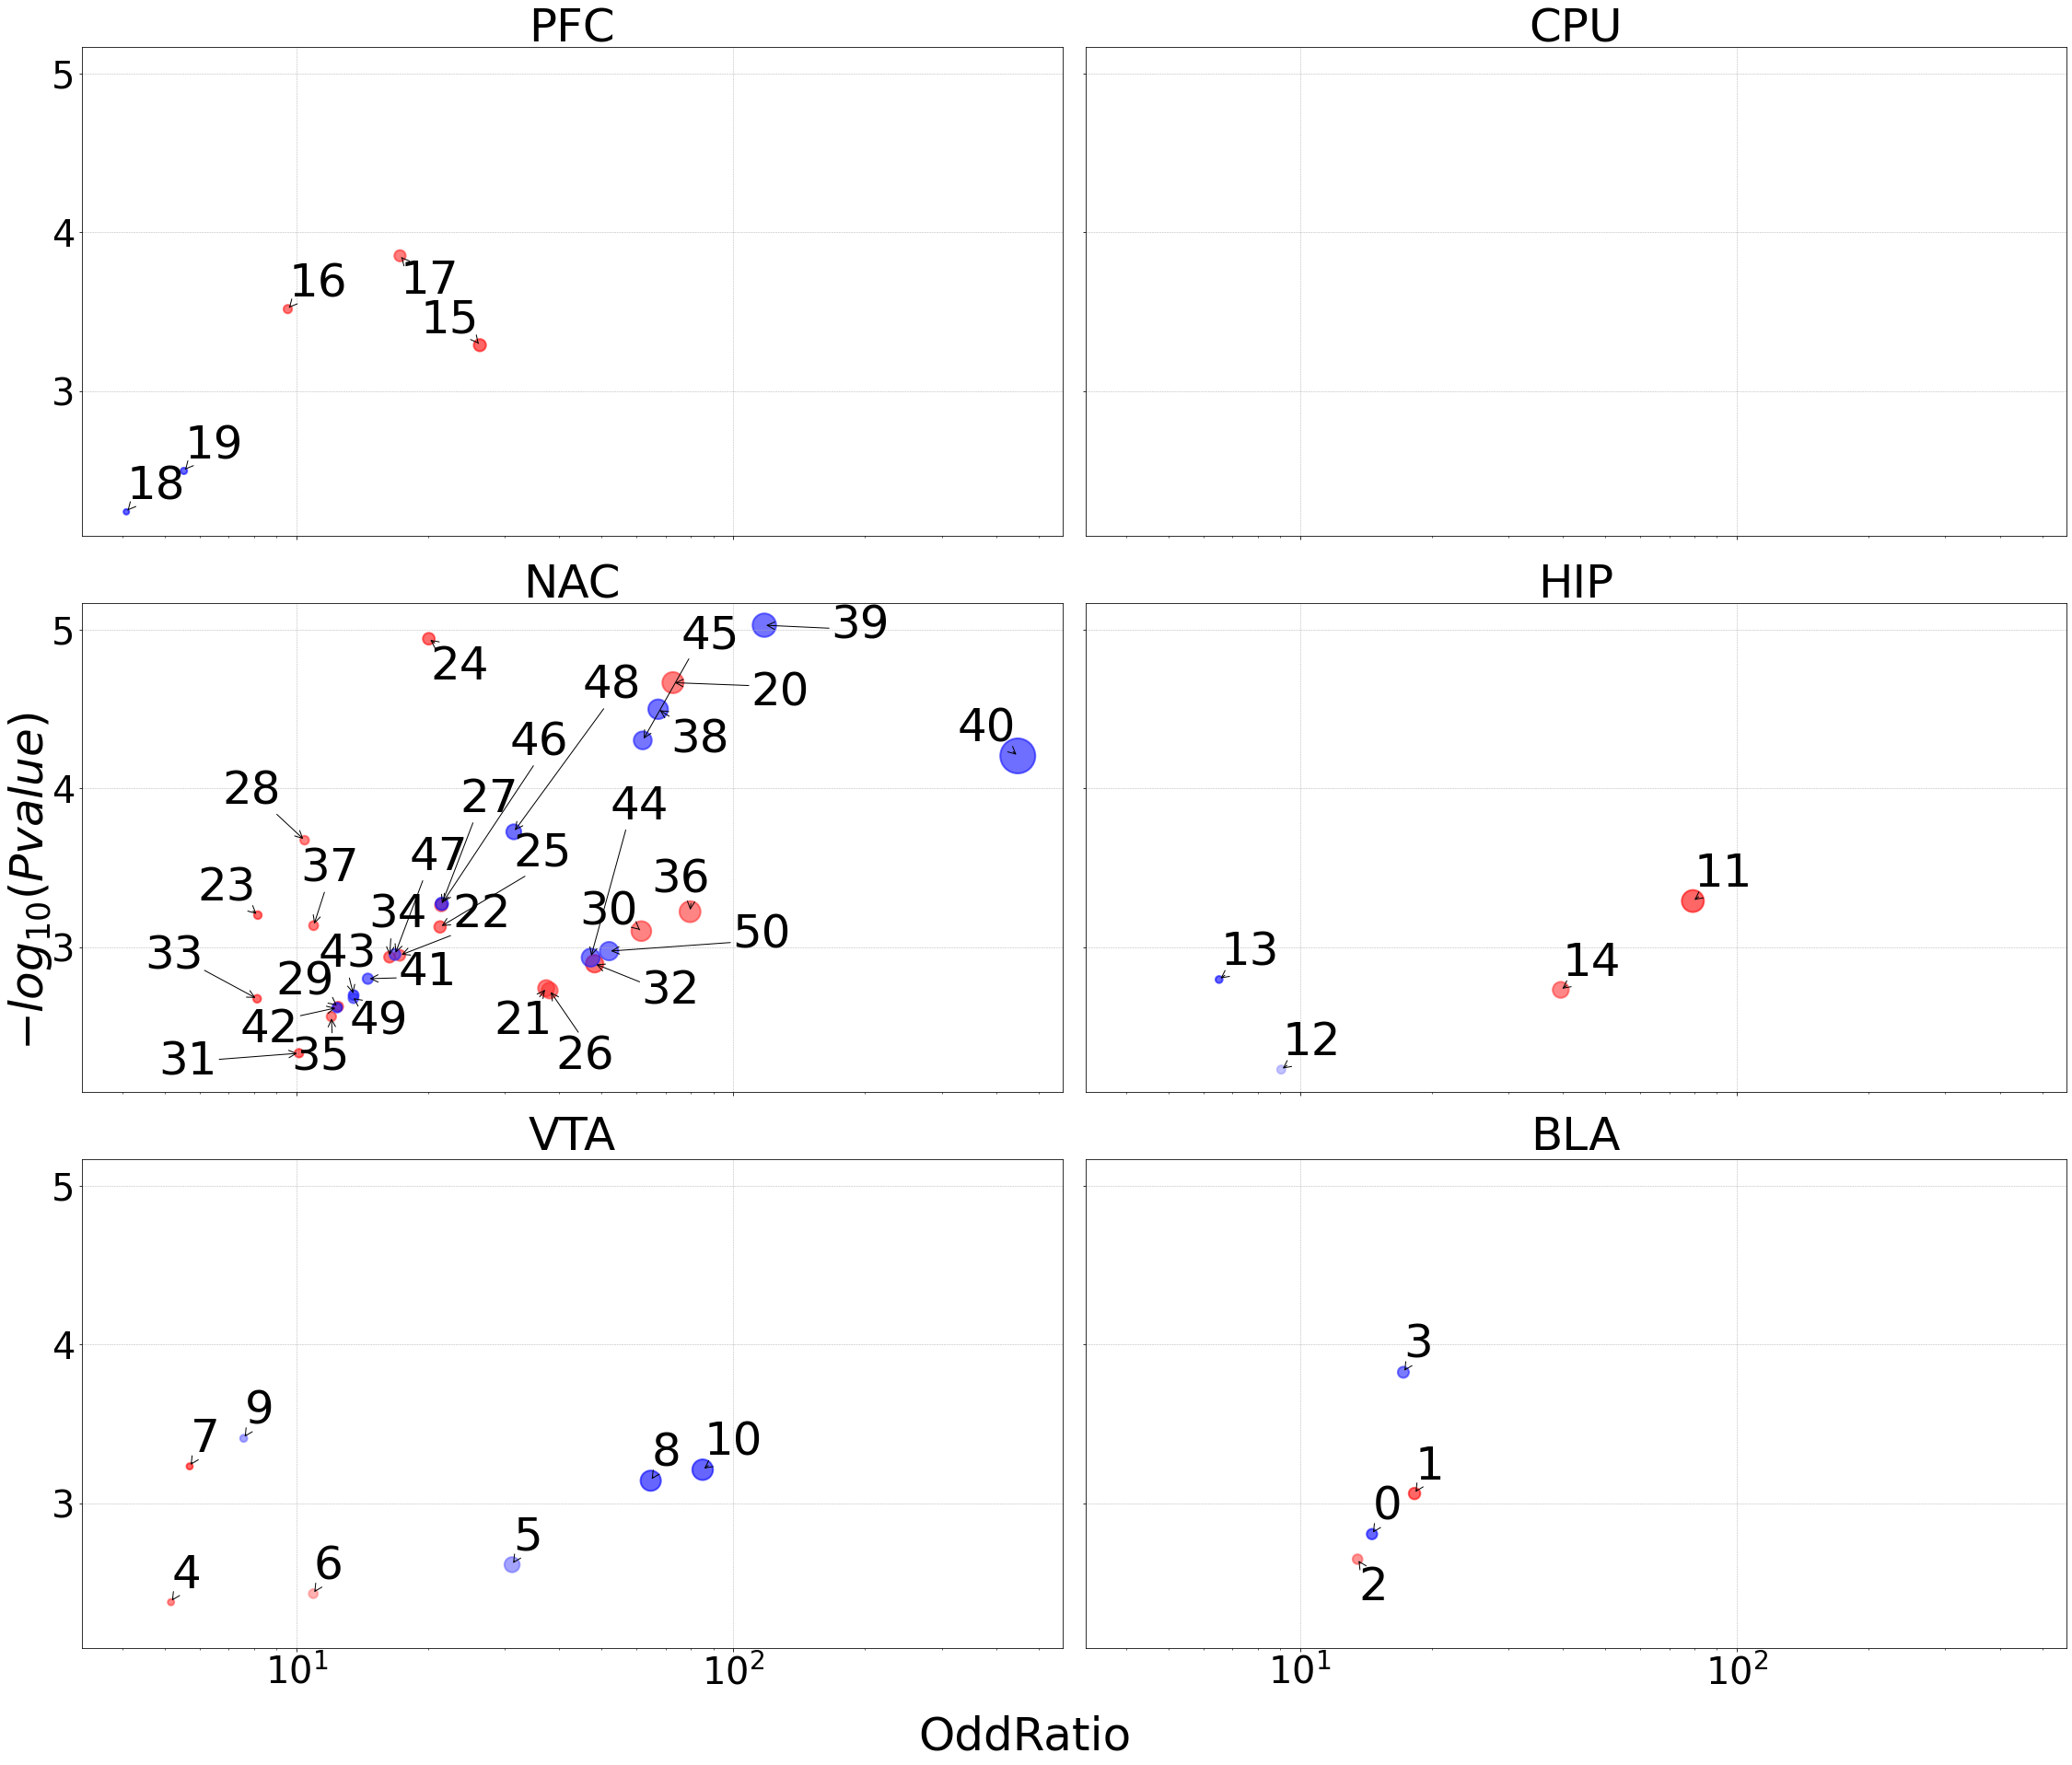

In [13]:
import pandas as pd
df_module_fixed_info = pd.read_csv("df_module_fixed_info_reordered.csv", index_col = 0)


import matplotlib.pyplot as plt
import math
from adjustText import adjust_text
count = 0



# plt.subplot(3, 2, 1)                # nrows=2, ncols=1, index=1
# plt.plot(x1, y1, 'o-')
# plt.title('1st Graph')
# plt.ylabel('Damped oscillation')

# plt.subplot(2, 1, 2)                # nrows=2, ncols=1, index=2
# plt.plot(x2, y2, '.-')
# plt.title('2nd Graph')
# plt.xlabel('time (s)')
# plt.ylabel('Undamped')

# plt.tight_layout()
# plt.show()

# # 네 개의 극좌표 축을 만들고 반환 된 배열을 통해 액세스합니다.
# .plot(x, y)
# axs[1, 1].scatter(x, y)

# # 서브 플롯의 각 열과 X 축 공유
# plt.subplots(2, 2, sharex='col')

# # 서브 플롯의 각 행과 Y 축 공유
# plt.subplots(2, 2, sharey='row')

# # 모든 서브 플롯과 X 축과 Y 축 모두 공유
# plt.subplots(2, 2, sharex='all', sharey='all')
plt.rc('xtick', labelsize=40) 
plt.rc('ytick', labelsize=40) 
fig, axs = plt.subplots(3, 2, sharex='all', sharey=True, figsize=(16 * 2, 9 * 3))

for i, region in enumerate(regions):
    df_module_fixed_info = pd.read_csv("df_module_fixed_info_reordered.csv", index_col = 0)
    df_module_fixed_info = df_module_fixed_info[df_module_fixed_info["Region"] == region] 
    
    # fig.set_facecolor('white')
    # plt.scatter(
    #     x = df_module_fixed_info["OddsRatio"], 
    #     y = [- math.log10(p) for p in df_module_fixed_info["GOPvalue"]], 
    #     s = df_module_fixed_info["EnrichmentRatio"] * 10, 
    #     c =  df_module_fixed_info["Corr"], 
    #     cmap="bwr",
    #     alpha=0.6, 
    #     linewidth=2);

    sc = axs[(i // 2)][(i % 2)].scatter(
        x = df_module_fixed_info["OddsRatio"], 
        y = [- math.log10(p) for p in df_module_fixed_info["GOPvalue"]], 
        s = df_module_fixed_info["EnrichmentRatio"] * 10, 
        c =  df_module_fixed_info["Corr"], 
        cmap="bwr",
        alpha=0.6, 
        linewidth=2);

    # plt.yscale('log')
    print([(i // 2), (i % 2)])
#     axs[(i // 2)][(i % 2)].set_xlabel("OddRatio", fontsize = 25)
#     axs[(i // 2)][(i % 2)].set_ylabel("$-log_{10}(P.value)$", fontsize = 25)
    axs[(i // 2)][(i % 2)].set_xscale("log")
#     axs[(i // 2), (i % 2)].set_xlim(0, 100)

    axs[(i // 2)][(i % 2)].set_title(region , fontsize = 50)
    axs[(i // 2)][(i % 2)].grid(True, which='major', linestyle='--', linewidth=0.5)

    txt_zip = zip(df_module_fixed_info["GOterm"], df_module_fixed_info["Region"])
    txt_arr = [txt[0] + " in " + txt[1] for txt in txt_zip]
    text_arr = []
    
    for ii, iii_txt in enumerate(zip(df_module_fixed_info.index, txt_arr)): #enumerate(txt_arr):
        
        text_arr.append( 
            axs[(i // 2)][(i % 2)].annotate(iii_txt[0], 
                     (df_module_fixed_info["OddsRatio"][iii_txt[0]],
                      [- math.log10(p) for p in df_module_fixed_info["GOPvalue"]][ii]),
                     ha='center', fontsize =50)
        )
        
#     axs[(i // 2)][(i % 2)].set_xticks(fontsize = 20)
#     axs[(i // 2)][(i % 2)].set_yticks(fontsize = 20)

    # for term in df_module_fixed_info["GOterm"]:
    # plt.text(df_module_fixed_info["OddsRatio"], [- math.log10(p) for p in df_module_fixed_info["GOPvalue"]], df_module_fixed_info["GOterm"])
#     axs[(i // 2), (i % 2)].clim(-1, 1)
#     cbar = axs[(i // 2), (i % 2)].colorbar()
#     cbar.ax.tick_params(labelsize=20)
    adjust_text(text_arr, arrowprops=dict(arrowstyle='->', color='black'), ax = axs[(i // 2)][(i % 2)])

#     plt.legend(
#         *[sc.legend_elements("sizes", num=6)[0], [i[:14] + str(int(i[14:-2]) // 10) + i[-2:] for i in sc.legend_elements("sizes", num=6)[1]]]
#         , title = "EnrichmentRatio"
#     )
#     cbar.ax.set_ylabel('Correlation', rotation=270, fontsize = 20)

fig.supxlabel("OddRatio", fontsize = 50)
fig.supylabel("$-log_{10}(Pvalue)$", fontsize = 50)

fig.tight_layout()


# plt.show()

# Temporally aligned gene module network (Fig. S6., Fig. 3.)

In [14]:
### Figure 3. Temporally aligned module network
import itertools
import matplotlib.pyplot as plt
import networkx as nx

regional_timepoint_hash = {}
regional_module_size_hash = {}
for region in ["BLA", "CPU", "NAC", "PFC", "VTA", "HIP"]:
    regional_timepoint_hash[region] = {}
    regional_module_size_hash[region] = {}
    
Regional_Mnames = []
for region in ["BLA", "CPU", "NAC", "PFC", "VTA", "HIP"]:
    plt.figure(figsize = (18,6))

    df_GOterm_table = pd.read_csv("Results/temporal/%s_GOterm_and_Gene_table.csv" % region, index_col = 0)
    df_ME = pd.read_csv("Results/temporal/%s-MEs0.csv" % region, index_col = 0)
    
    df_MEdiss = pd.read_csv("Results/temporal/%s-MEDiss-tmp.csv" % region, index_col = 0)

    print(region)
    melted_df = pd.read_csv("Integrated_Module_AI_alignmnet.csv")
    Mnames = melted_df[(melted_df["Region"] == region) & (abs(melted_df["Corr"]) > 0.5) & (melted_df["Pvalue"] < 0.05)].Mname
    Regional_Mnames.extend([region + "_" + Mname for Mname in Mnames])# = 
    for name in Mnames:
        regional_timepoint_hash[region][name] = df_ME[name].idxmax()

for region in ["BLA", "CPU", "NAC", "PFC", "VTA", "HIP"]:
    for key in regional_timepoint_hash[region].keys():
        regional_timepoint_hash[region][key] = str(int(regional_timepoint_hash[region][key][1:]) // 4 )

BLA
CPU
NAC
PFC
VTA
HIP


<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

<Figure size 1296x432 with 0 Axes>

In [15]:
merged_EG = pd.DataFrame()
for region in regions:
    #     plt.figure(figsize= (18,9))
    df_ME = pd.read_csv("Results/temporal/%s-MEs0.csv" % region, index_col = 0)
    Mnames = melted_df[(melted_df["Region"] == region) & (abs(melted_df["Corr"]) > 0.5) & (melted_df["Pvalue"] < 0.05)].Mname 
    for Mname in Mnames :
        merged_EG[region + "_" + Mname] = df_ME[Mname]

corr_between_region = merged_EG.corr(method="pearson")

In [20]:
Diss_between_region = 1 - corr_between_region
# modified_G = G

In [21]:
layers = []

for i in range(0, 25):
    layers.append([])
    
Mnames = Regional_Mnames
for i, layer in enumerate(layers):
    for Mname in Mnames: 
        if i == int(regional_timepoint_hash[Mname.split("_")[0]][Mname.split("_")[1]]):
            layers[i].append(Mname)

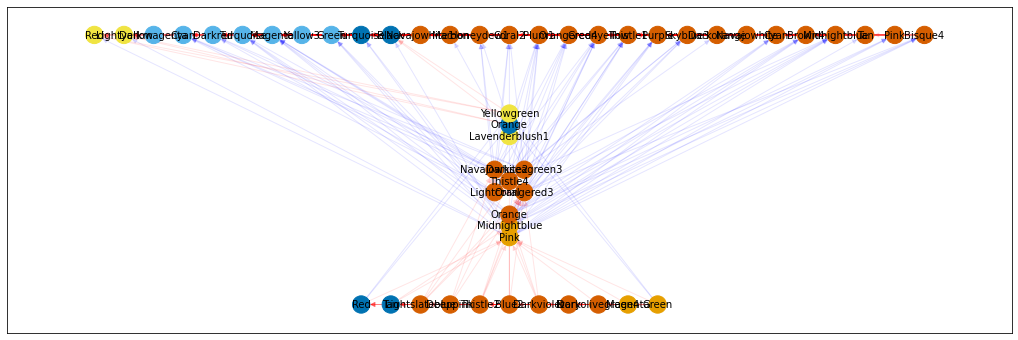

In [25]:
from itertools import combinations

G = nx.DiGraph()
regional_color_hash = {"BLA": (230 / 255, 159 / 255, 0), "VTA": (86 / 255, 180 / 255, 233 / 255), "CPU": (0, 158 / 255, 115 / 255), "HIP": (240 / 255, 228 / 255, 66 / 255), "PFC": (0, 114 / 255, 178 / 255), "NAC": (213 / 255, 94 / 255, 0)}


for i, layer in enumerate(layers):
    G.add_nodes_from(layer, layer = i)

pos = nx.multipartite_layout(G, subset_key="layer", align = "horizontal")
node_colors = []
for node in G.nodes:
    node_colors.append(regional_color_hash[node.split("_")[0]])
EarLate_pairs = []
EarLate_pairs.extend([ node for node in pos if pos[node][1] == min( [pos[node][1] for node in pos]) ])
EarLate_pairs.extend([ node for node in pos if pos[node][1] == max( [pos[node][1] for node in pos]) ])


EarLat_coms = list(combinations(EarLate_pairs, 2))

filtered_com = list(set(combinations(G.nodes, 2)) - set(EarLat_coms))
for com in filtered_com:
    if com[0].split("_")[0] == com[1].split("_")[0]:
        
        df_MEdiss = pd.read_csv("Results/temporal/%s-MEDiss-tmp.csv" % com[0].split("_")[0], index_col = 0)
        if (1-df_MEdiss[com[0].split("_")[1]][com[1].split("_")[1]] > 0.95) and com not in EarLat_coms:
            G.add_edge(com[0],com[1],
                       color = "r"
            )
        elif (1-df_MEdiss[com[0].split("_")[1]][com[1].split("_")[1]] < -0.95) and com not in EarLat_coms:
            G.add_edge(com[0],com[1],
                       color = "b"
            )
    else:
        if (1-Diss_between_region[com[0]][com[1]] > 0.95) and com not in EarLat_coms:
            G.add_edge(com[0],com[1],
                       color = "r"
            )
        elif (1-Diss_between_region[com[0]][com[1]] < -0.95) and com not in EarLat_coms:
            G.add_edge(com[0],com[1],
                       color = "b"
            )
    
pos_adjusted = {}
adjust_hash = {}
modified_G = G
plt.figure(figsize = (18,6))
nx.draw_networkx_nodes(G, pos, node_color=node_colors)
nx.draw_networkx_labels(G, pos,
                        labels= dict(zip(modified_G.nodes, [node.split("_")[1][2:].capitalize() for node in modified_G.nodes])),
                        font_size= 10
                       )
edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
nx.draw_networkx_edges(G, pos, edge_color=colors, alpha=0.1)

In [26]:
filtered_m_df = pd.read_csv("Module-trait_algined_table.csv", index_col = 0)
filtered_m_df
labels= dict(zip(modified_G.nodes, [filtered_m_df[(filtered_m_df["Region"] == node.split("_")[0]) & (filtered_m_df["Mname"] == node.split("_")[1])].index[0] for node in modified_G.nodes]))


C:\Users\TAEHYE~1\AppData\Local\Temp/ipykernel_20696/1717727257.py:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  labels[key] = df_module_fixed_info.loc[df_module_fixed_info["Region"] == key.split("_")[0]][df_module_fixed_info["Mname"] ==  key.split("_")[1] ].index.values[0]
C:\Users\TAEHYE~1\AppData\Local\Temp/ipykernel_20696/1717727257.py:149: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  labels[key] = df_module_fixed_info.loc[df_module_fixed_info["Region"] == key.split("_")[0]][df_module_fixed_info["Mname"] ==  key.split("_")[1] ].index.values[0]
C:\Users\TAEHYE~1\AppData\Local\Temp/ipykernel_20696/1717727257.py:274: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  labels[key] = df_module_fixed_info.loc[df_module_fixed_info["Region"] == key.split("_")[0]][df_module_fixed_info["Mname"] ==  key.split("_")[1] ].index.values[0]


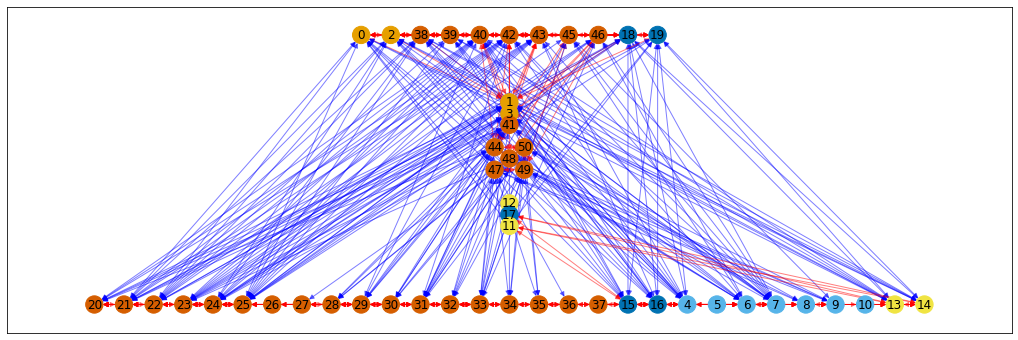

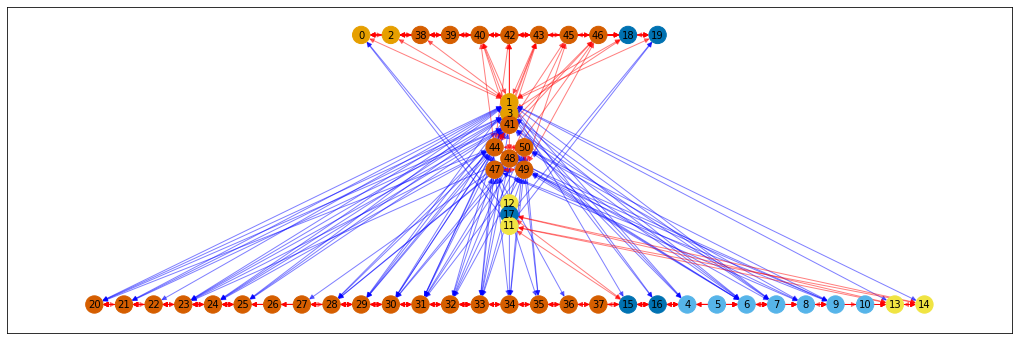

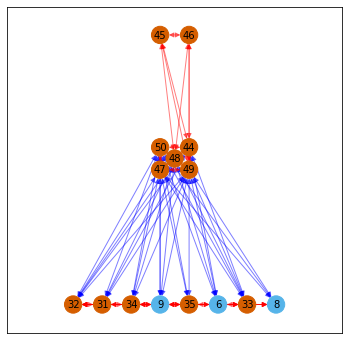

In [31]:
from itertools import combinations

G = nx.DiGraph()
regional_color_hash = {"BLA": (230 / 255, 159 / 255, 0), "VTA": (86 / 255, 180 / 255, 233 / 255), "CPU": (0, 158 / 255, 115 / 255), "HIP": (240 / 255, 228 / 255, 66 / 255), "PFC": (0, 114 / 255, 178 / 255), "NAC": (213 / 255, 94 / 255, 0)}


for i, layer in enumerate(layers):
    G.add_nodes_from(layer, layer = i)

pos = nx.multipartite_layout(G, subset_key="layer", align = "horizontal")
node_colors = []
for node in G.nodes:
    node_colors.append(regional_color_hash[node.split("_")[0]])
EarLate_pairs = []

EarLate_pairs.extend([ node for node in pos if pos[node][0] == max( [pos[node][0] for node in pos]) ])
EarLate_pairs.extend([ node for node in pos if pos[node][0] == min( [pos[node][0] for node in pos]) ])
for com in combinations(G.nodes, 2):
    if com[0].split("_")[0] == com[1].split("_")[0]:
        df_MEdiss = pd.read_csv("Results/temporal/%s-MEDiss-tmp.csv" % com[0].split("_")[0], index_col = 0)
        if 1-df_MEdiss[com[0].split("_")[1]][com[1].split("_")[1]] > 0.95:
            G.add_edge(com[0],com[1],
                       color = "r"
            )
        elif 1-df_MEdiss[com[0].split("_")[1]][com[1].split("_")[1]] < -0.95:
            G.add_edge(com[0],com[1],
                       color = "b"
            )
    else:
        if 1-Diss_between_region[com[0]][com[1]] > 0.95:
            G.add_edge(com[0],com[1],
                       color = "r"
            )
        elif 1-Diss_between_region[com[0]][com[1]] < -0.95:
            G.add_edge(com[0],com[1],
                       color = "b",
            )
    
pos_adjusted = {}
adjust_hash = {}
# for upside-down
pos = dict(zip(pos.keys(), [v * -1 for v in pos.values()]))


lables = dict(zip(modified_G.nodes, [filtered_m_df[(filtered_m_df["Region"] == node.split("_")[0]) & (filtered_m_df["Mname"] == node.split("_")[1])].index[0] for node in modified_G.nodes]))
labels= dict(zip(G.nodes, [filtered_m_df[(filtered_m_df["Region"] == node.split("_")[0]) & (filtered_m_df["Mname"] == node.split("_")[1])].index[0] for node in G.nodes]))

df_module_fixed_info = pd.read_csv("df_module_fixed_info_reordered.csv", index_col = 0)
for key in labels.keys():
    labels[key] = df_module_fixed_info.loc[df_module_fixed_info["Region"] == key.split("_")[0]][df_module_fixed_info["Mname"] ==  key.split("_")[1] ].index.values[0]


plt.figure(figsize = (18,6))
nx.draw_networkx_nodes(G, pos, node_color=node_colors)
nx.draw_networkx_labels(G, pos,
labels=labels )
edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
nx.draw_networkx_edges(G, pos, edge_color=colors, alpha=0.5,arrowstyle="<|-|>")

### Starting reduced one

from itertools import combinations

G = nx.DiGraph()
regional_color_hash = {"BLA": (230 / 255, 159 / 255, 0), "VTA": (86 / 255, 180 / 255, 233 / 255), "CPU": (0, 158 / 255, 115 / 255), "HIP": (240 / 255, 228 / 255, 66 / 255), "PFC": (0, 114 / 255, 178 / 255), "NAC": (213 / 255, 94 / 255, 0)}

region = "NAC"
df_MEdiss = pd.read_csv("Results/temporal/%s-MEDiss-tmp.csv" % com[0].split("_")[0], index_col = 0)
nodes_to_remove = []



# nodes_to_remove.extend(["NAC_"+ n for n in df_MEdiss[abs(1-df_MEdiss["MEnavajowhite2"]) <= 0.95].index])

# nodes_to_remove.extend(Diss_between_region[abs(1-Diss_between_region["NAC_MEnavajowhite2"]) <= 0.95].index)

# nodes_to_remove = list(set(nodes_to_remove) - set(["NAC_MEnavajowhite2"]))

focused_layers = []
for layer in layers:
    layer = list(set(layer) - set(nodes_to_remove))
    focused_layers.append(layer)
    

len(nodes_to_remove)
for i, layer in enumerate(layers):
#     focused_layer = list(set(layer) - set(nodes_to_remove))
#     G.add_nodes_from(focused_layer, layer = i)
    
    G.add_nodes_from(layer, layer = i)
    
    
### removing non-interested modules from figure



pos = nx.multipartite_layout(G, subset_key="layer", align = "horizontal")
node_colors = []

# for node_to_remove in nodes_to_remove:
#     if node_to_remove in G.nodes():
#         G.remove_node(node_to_remove)

for node in G.nodes:
    node_colors.append(regional_color_hash[node.split("_")[0]])
EarLate_pairs = []
EarLate_pairs.extend([ node for node in pos if pos[node][1] == min( [pos[node][1] for node in pos]) ])
EarLate_pairs.extend([ node for node in pos if pos[node][1] == max( [pos[node][1] for node in pos]) ])


EarLat_coms = list(combinations(EarLate_pairs, 2))

filtered_com = list(set(combinations(G.nodes, 2)) - set(EarLat_coms))
for com in filtered_com:
    if com[0].split("_")[0] == com[1].split("_")[0]:
        df_MEdiss = pd.read_csv("Results/temporal/%s-MEDiss-tmp.csv" % com[0].split("_")[0], index_col = 0)
        if (com[0] not in nodes_to_remove) and (com[1] not in nodes_to_remove):
            if (1-df_MEdiss[com[0].split("_")[1]][com[1].split("_")[1]] > 0.95) and com not in EarLat_coms:
                G.add_edge(com[0],com[1],
                           color = "r"
                )
            elif (1-df_MEdiss[com[0].split("_")[1]][com[1].split("_")[1]] < -0.95) and com not in EarLat_coms:
                G.add_edge(com[0],com[1],
                           color = "b"
                )
    else:
        if (com[0] not in nodes_to_remove) and (com[1] not in nodes_to_remove):
            if (1-Diss_between_region[com[0]][com[1]] > 0.95) and com not in EarLat_coms:
                G.add_edge(com[0],com[1],
                           color = "r"
                )
            elif (1-Diss_between_region[com[0]][com[1]] < -0.95) and com not in EarLat_coms:
                G.add_edge(com[0],com[1],
                           color = "b"
                )

pos_adjusted = {}
adjust_hash = {}

# for upside-down
pos = dict(zip(pos.keys(), [v * -1 for v in pos.values()]))

labels= dict(zip(G.nodes, [filtered_m_df[(filtered_m_df["Region"] == node.split("_")[0]) & (filtered_m_df["Mname"] == node.split("_")[1])].index[0] for node in G.nodes]))

    
df_module_fixed_info = pd.read_csv("df_module_fixed_info_reordered.csv", index_col = 0)
for key in labels.keys():
    labels[key] = df_module_fixed_info.loc[df_module_fixed_info["Region"] == key.split("_")[0]][df_module_fixed_info["Mname"] ==  key.split("_")[1] ].index.values[0]

# for node_to_remove in nodes_to_remove:
#     if node_to_remove in lables.keys():
#         lables.pop(node_to_remove)
        
plt.figure(figsize = (18,6))



nx.draw_networkx_nodes(G, pos, node_color=node_colors)
G.nodes()
nx.draw_networkx_labels(G, pos,
                        labels= labels,
                        font_size= 10
                       )
edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
nx.draw_networkx_edges(G, pos, edge_color=colors, alpha=0.5,arrowstyle="<|-|>")




### Starting reduced one

from itertools import combinations

G = nx.DiGraph()
regional_color_hash = {"BLA": (230 / 255, 159 / 255, 0), "VTA": (86 / 255, 180 / 255, 233 / 255), "CPU": (0, 158 / 255, 115 / 255), "HIP": (240 / 255, 228 / 255, 66 / 255), "PFC": (0, 114 / 255, 178 / 255), "NAC": (213 / 255, 94 / 255, 0)}

region = "NAC"
df_MEdiss = pd.read_csv("Results/temporal/%s-MEDiss-tmp.csv" % com[0].split("_")[0], index_col = 0)
nodes_to_remove = []



# nodes_to_remove.extend(["NAC_"+ n for n in df_MEdiss[abs(1-df_MEdiss["MEnavajowhite2"]) <= 0.95].index])

nodes_to_remove.extend(Diss_between_region[abs(1-Diss_between_region["NAC_MEnavajowhite2"]) <= 0.95].index)

nodes_to_remove = list(set(nodes_to_remove) - set(["NAC_MEnavajowhite2"]))

focused_layers = []
for layer in layers:
    layer = list(set(layer) - set(nodes_to_remove))
    focused_layers.append(layer)
    

len(nodes_to_remove)
# for i, layer in enumerate(layers):
# #     focused_layer = list(set(layer) - set(nodes_to_remove))
# #     G.add_nodes_from(focused_layer, layer = i)
    
#     G.add_nodes_from(layer, layer = i)
    
for i, layer in enumerate(focused_layers):
#     focused_layer = list(set(layer) - set(nodes_to_remove))
#     G.add_nodes_from(focused_layer, layer = i)
    G.add_nodes_from(layer, layer = i)
    
### removing non-interested modules from figure



pos = nx.multipartite_layout(G, subset_key="layer", align = "horizontal")
node_colors = []

# for node_to_remove in nodes_to_remove:
#     if node_to_remove in G.nodes():
#         G.remove_node(node_to_remove)

for node in G.nodes:
    if node in nodes_to_remove:
        node_colors.append("white")
    else:
        node_colors.append(regional_color_hash[node.split("_")[0]])
EarLate_pairs = []
EarLate_pairs.extend([ node for node in pos if pos[node][1] == min( [pos[node][1] for node in pos]) ])
EarLate_pairs.extend([ node for node in pos if pos[node][1] == max( [pos[node][1] for node in pos]) ])


EarLat_coms = list(combinations(EarLate_pairs, 2))

filtered_com = list(set(combinations(G.nodes, 2)) - set(EarLat_coms))
for com in filtered_com:
    if com[0].split("_")[0] == com[1].split("_")[0]:
        df_MEdiss = pd.read_csv("Results/temporal/%s-MEDiss-tmp.csv" % com[0].split("_")[0], index_col = 0)
        if (com[0] not in nodes_to_remove) and (com[1] not in nodes_to_remove):
            if (1-df_MEdiss[com[0].split("_")[1]][com[1].split("_")[1]] > 0.95) and com not in EarLat_coms:
                G.add_edge(com[0],com[1],
                           color = "r"
                )
            elif (1-df_MEdiss[com[0].split("_")[1]][com[1].split("_")[1]] < -0.95) and com not in EarLat_coms:
                G.add_edge(com[0],com[1],
                           color = "b"
                )
    else:
        if (com[0] not in nodes_to_remove) and (com[1] not in nodes_to_remove):
            if (1-Diss_between_region[com[0]][com[1]] > 0.95) and com not in EarLat_coms:
                G.add_edge(com[0],com[1],
                           color = "r"
                )
            elif (1-Diss_between_region[com[0]][com[1]] < -0.95) and com not in EarLat_coms:
                G.add_edge(com[0],com[1],
                           color = "b"
                )

pos_adjusted = {}
adjust_hash = {}

# for upside-down
pos = dict(zip(pos.keys(), [v * -1 for v in pos.values()]))


# lables = dict(zip(modified_G.nodes, [filtered_m_df[(filtered_m_df["Region"] == node.split("_")[0]) & (filtered_m_df["Mname"] == node.split("_")[1])].index[0] for node in modified_G.nodes]))
# labels = dict(zip(modified_G.nodes, [filtered_m_df[(filtered_m_df["Region"] == node.split("_")[0]) & (filtered_m_df["Mname"] == node.split("_")[1])].index[0] for node in modified_G.nodes]))
# labels= dict(zip(modified_G.nodes, [filtered_m_df[(filtered_m_df["Region"] == node.split("_")[0]) & (filtered_m_df["Mname"] == node.split("_")[1])].index[0] for node in modified_G.nodes]))
# labels = dict(zip(G.nodes, [filtered_m_df[(filtered_m_df["Region"] == node.split("_")[0]) & (filtered_m_df["Mname"] == node.split("_")[1])].index[0] for node in modified_G.nodes]))
# labels= dict(zip(modified_G.nodes, [filtered_m_df[(filtered_m_df["Region"] == node.split("_")[0]) & (filtered_m_df["Mname"] == node.split("_")[1])].index[0] for node in modified_G.nodes]))

labels= dict(zip(G.nodes, [filtered_m_df[(filtered_m_df["Region"] == node.split("_")[0]) & (filtered_m_df["Mname"] == node.split("_")[1])].index[0] for node in G.nodes]))

    
df_module_fixed_info = pd.read_csv("df_module_fixed_info_reordered.csv", index_col = 0)
for key in labels.keys():
    labels[key] = df_module_fixed_info.loc[df_module_fixed_info["Region"] == key.split("_")[0]][df_module_fixed_info["Mname"] ==  key.split("_")[1] ].index.values[0]

# for node_to_remove in nodes_to_remove:
#     if node_to_remove in lables.keys():
#         lables.pop(node_to_remove)
        
# plt.figure(figsize = (18,6))

plt.figure(figsize = (6,6))
plt.margins(x=0.25)


nx.draw_networkx_nodes(G, pos, node_color=node_colors)
G.nodes()
nx.draw_networkx_labels(G, pos,
                        labels= labels,
                        font_size= 10
                       )
edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
nx.draw_networkx_edges(G, pos, edge_color=colors, alpha=0.5,arrowstyle="<|-|>")

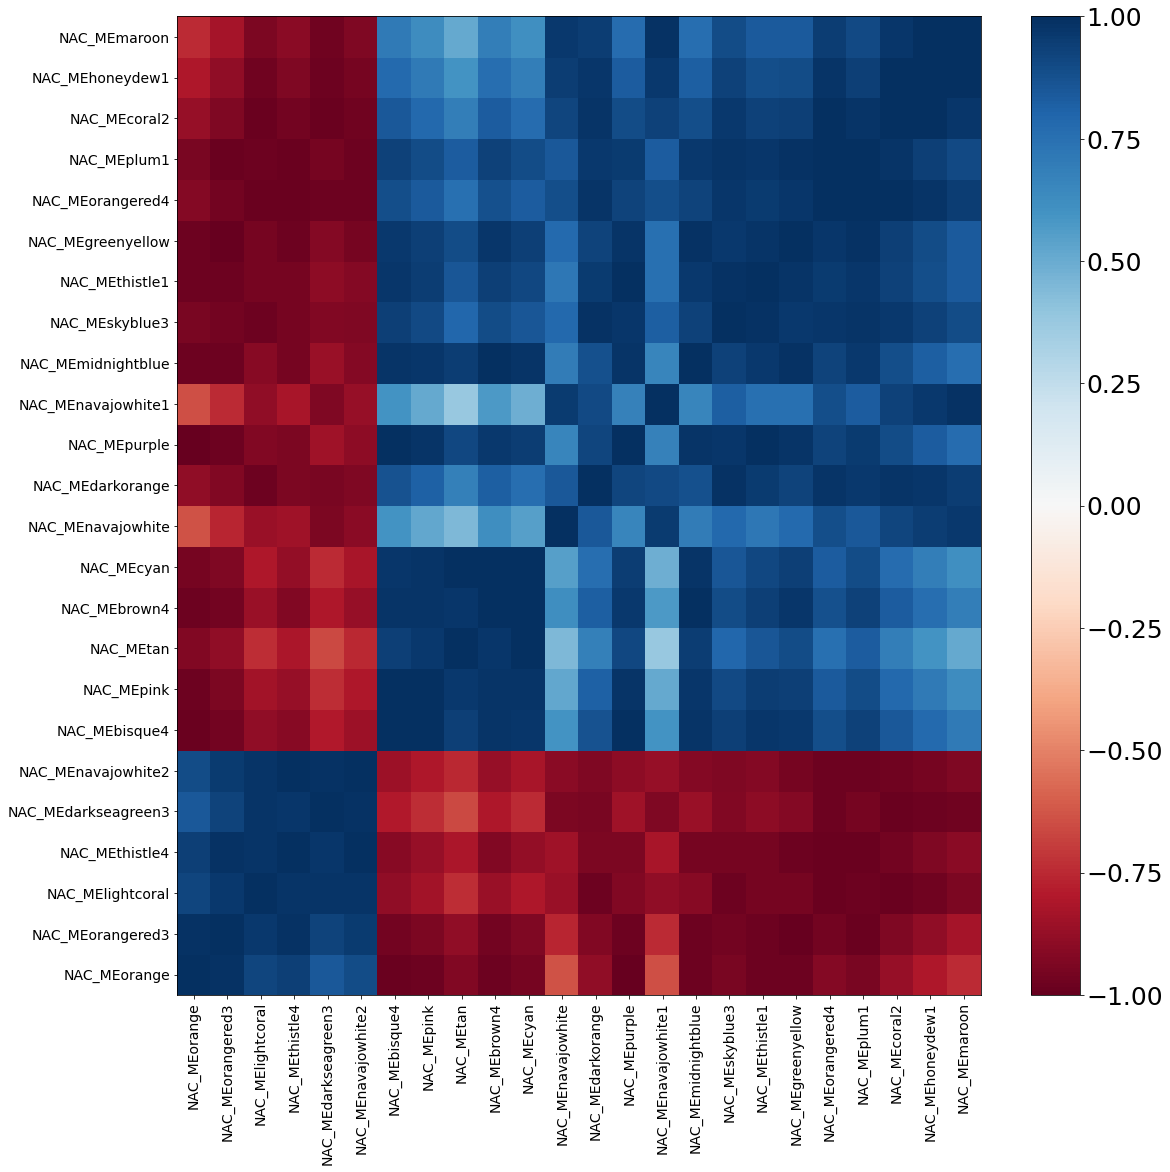

In [32]:

plt.figure(figsize= (18,18))
plt.rcParams["image.cmap"] = 'RdBu'
scope = ["NAC_MEorange", "NAC_MEorangered3", "NAC_MElightcoral",
         "NAC_MEthistle4", "NAC_MEdarkseagreen3", "NAC_MEnavajowhite2",
         "NAC_MEbisque4", "NAC_MEpink", "NAC_MEtan", "NAC_MEbrown4","NAC_MEcyan", "NAC_MEnavajowhite", "NAC_MEdarkorange", "NAC_MEpurple", "NAC_MEnavajowhite1",
        "NAC_MEmidnightblue", "NAC_MEskyblue3", "NAC_MEthistle1", "NAC_MEgreenyellow", "NAC_MEorangered4", "NAC_MEplum1", "NAC_MEcoral2", "NAC_MEhoneydew1", "NAC_MEmaroon"]
tmp_corr_between_region = corr_between_region.loc[scope, scope]

plt.pcolor(tmp_corr_between_region)

plt.xticks(np.arange(0.5, len(tmp_corr_between_region.columns), 1), tmp_corr_between_region.columns, rotation='vertical', fontsize=14)
plt.yticks(np.arange(0.5, len(tmp_corr_between_region.index), 1), tmp_corr_between_region.index, fontsize=14)

plt.clim(-1., 1.)
plt.colorbar()

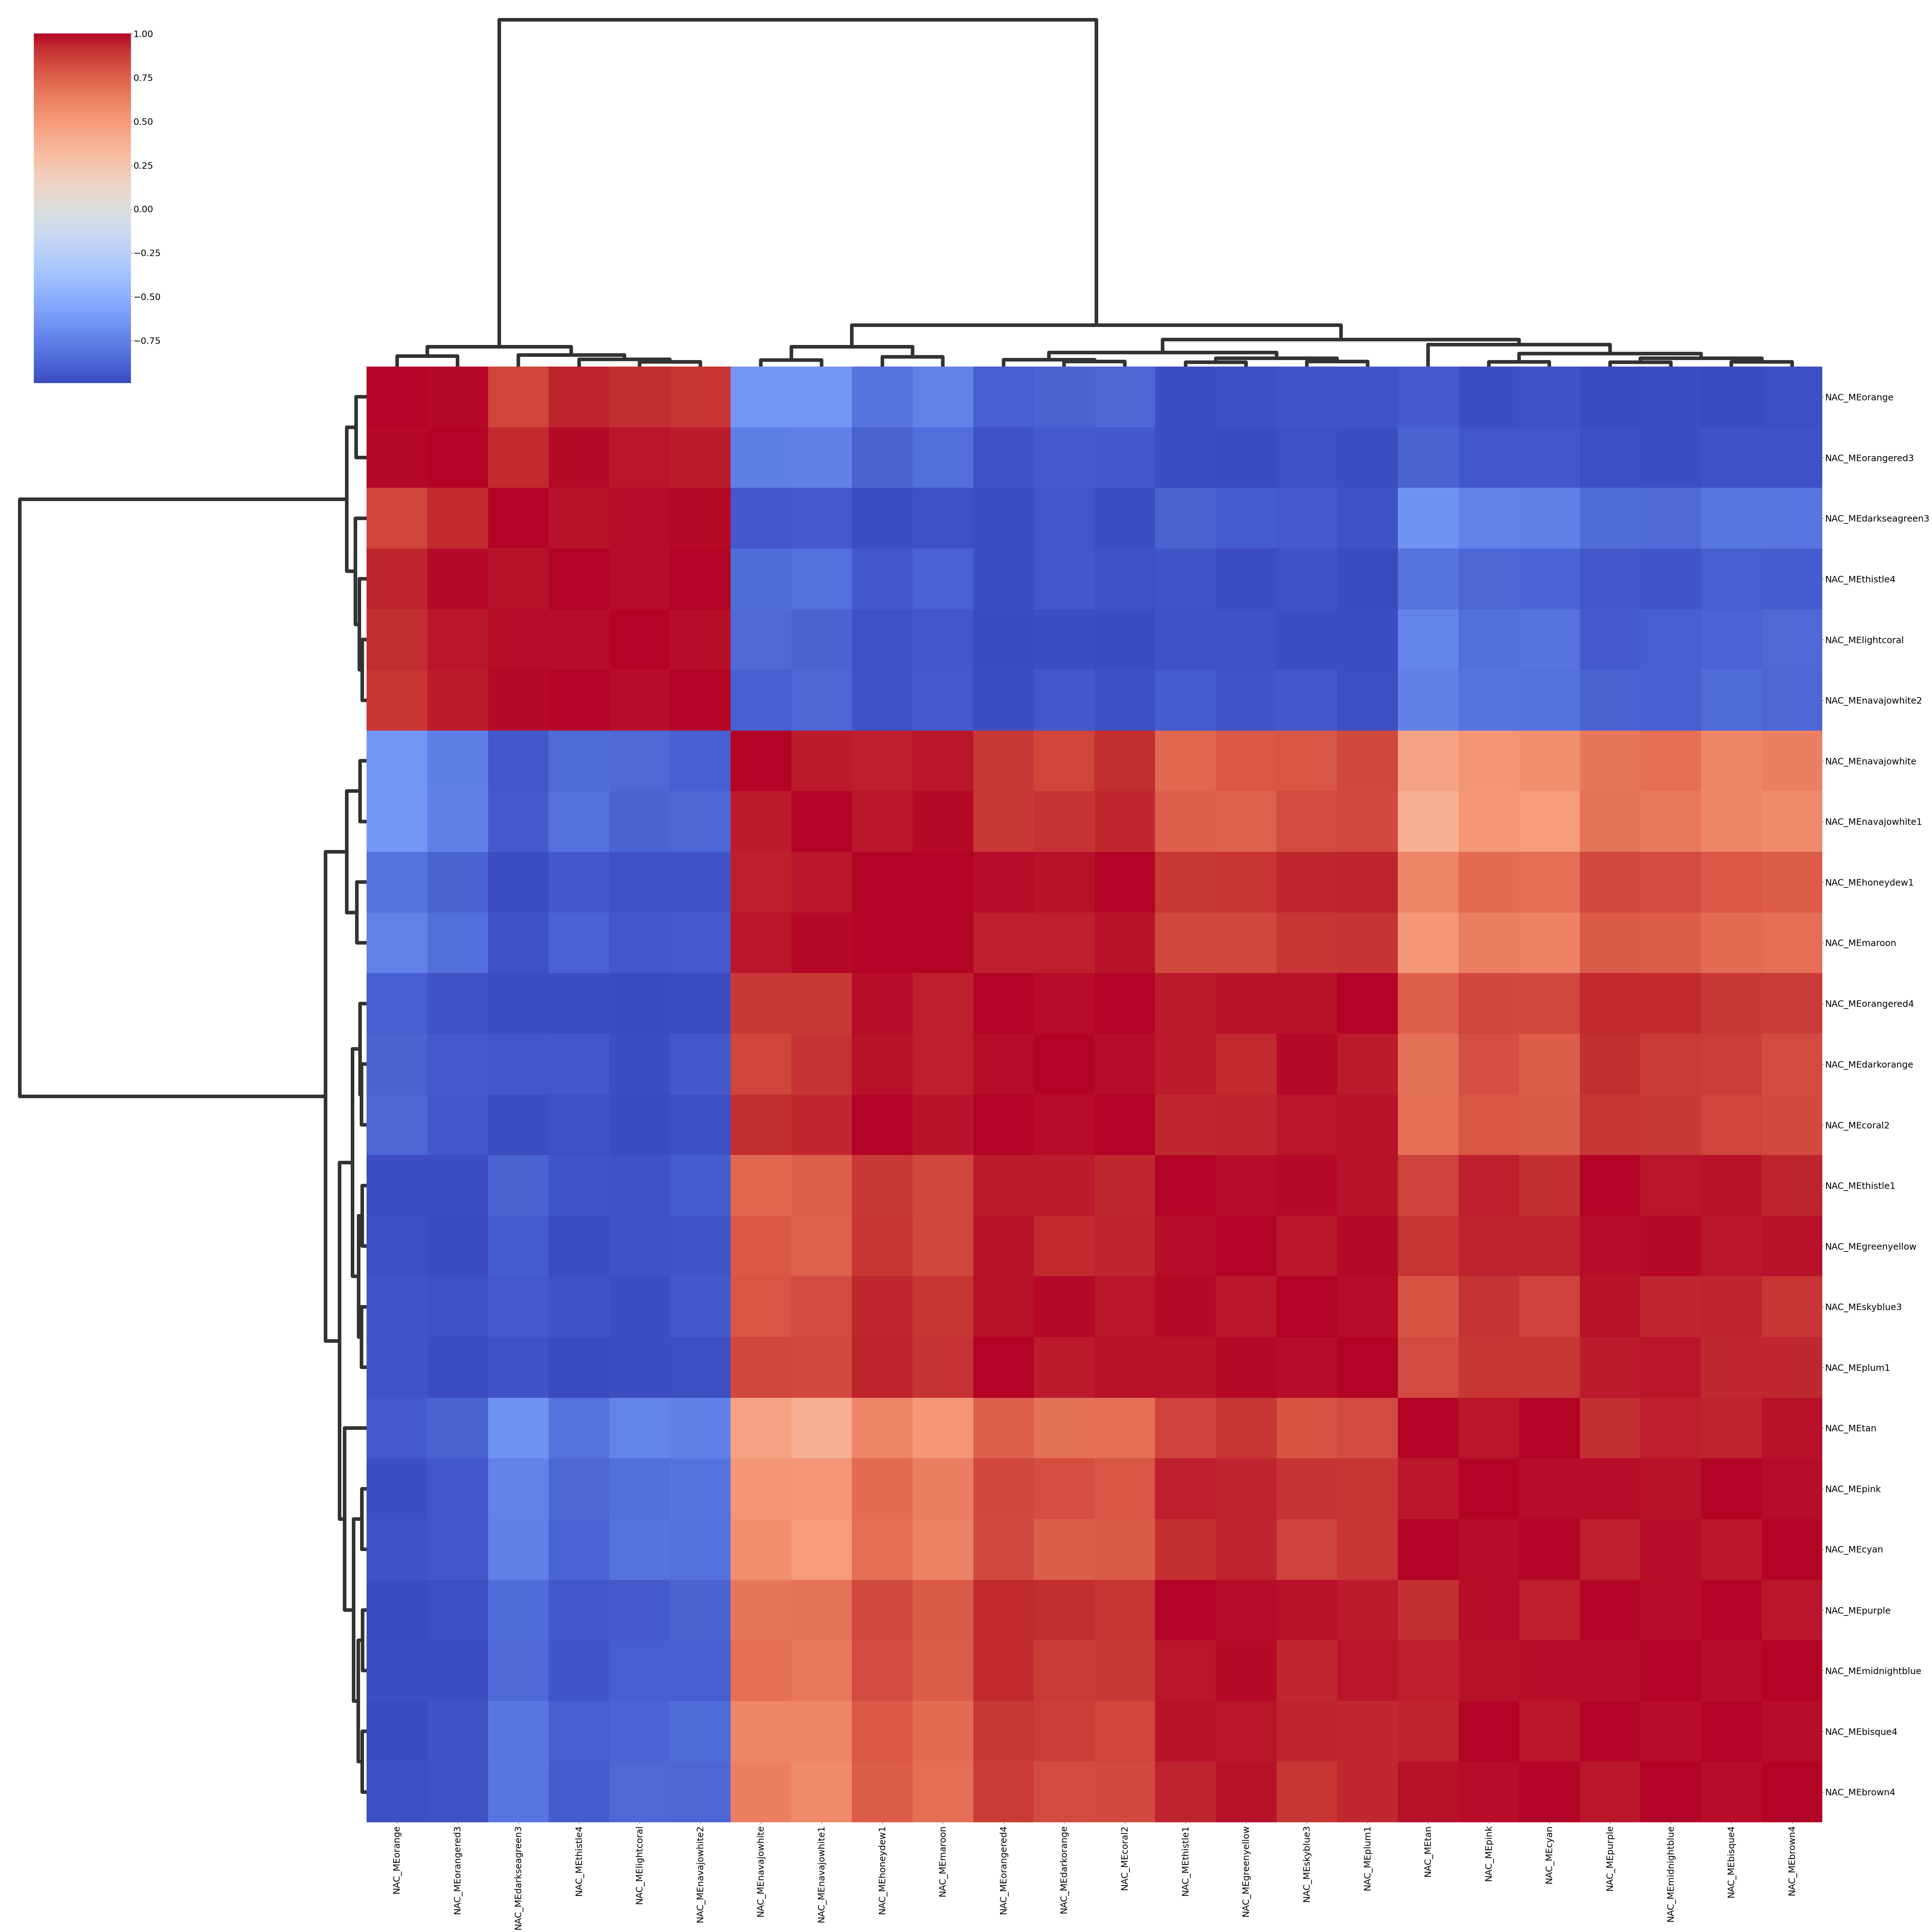

In [33]:
import seaborn as sns# ; sns.set_theme(color_codes=True)
# palette = sns.color_palette("RdBu")
# sns.color_palette("coolwarm", as_cmap=True)
# sns.set_palette("coolwarm")
GOterm_index = []

for index in tmp_corr_between_region.index:
    GOterm_index.append(index)#melted_df[(melted_df["Region"] == "NAC") & (melted_df["Mname"] == index.split("_")[1])].GOterm.values[0])
    
tmp_corr_between_region_GOterm = tmp_corr_between_region.copy()
tmp_corr_between_region_GOterm.index = GOterm_index
tmp_corr_between_region_GOterm.columns = GOterm_index

g = sns.clustermap(tmp_corr_between_region_GOterm,figsize=(75, 75), cmap="coolwarm")
for a in g.ax_row_dendrogram.collections:
    a.set_linewidth(10)

for a in g.ax_col_dendrogram.collections:
    a.set_linewidth(10)

# GO results for groups (Fig. S8., Fig. S9)

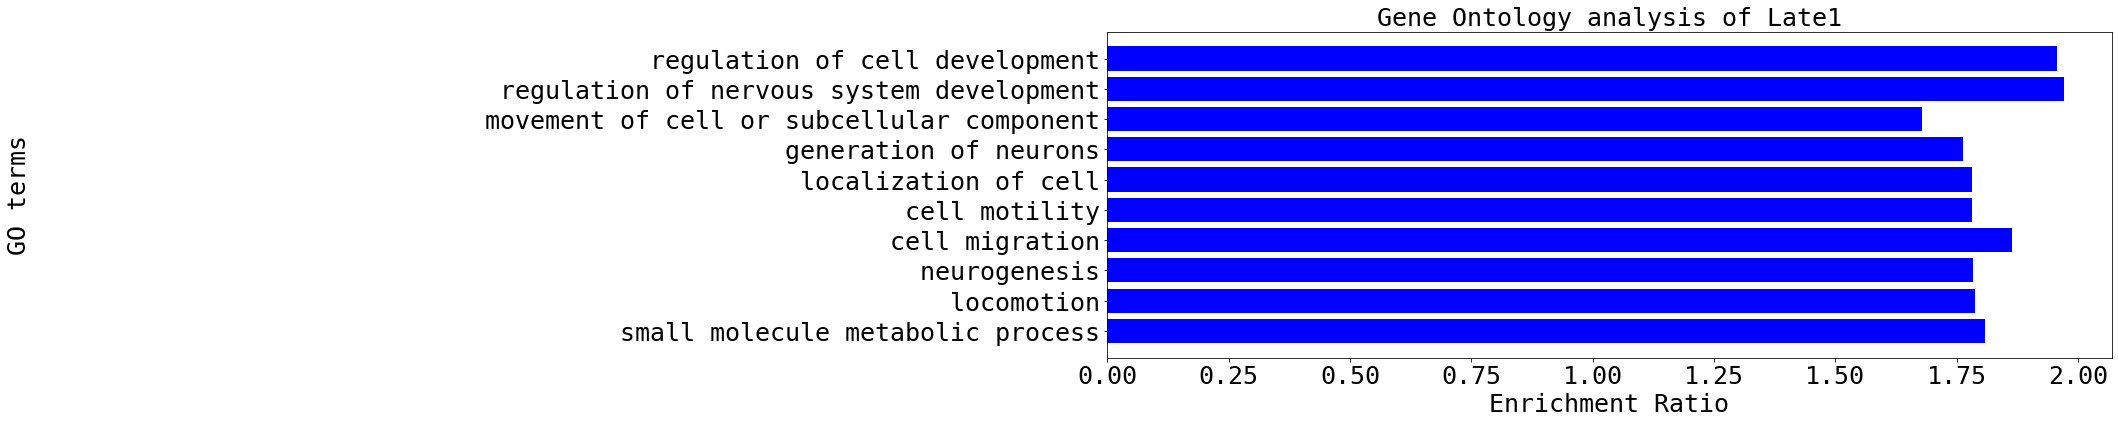

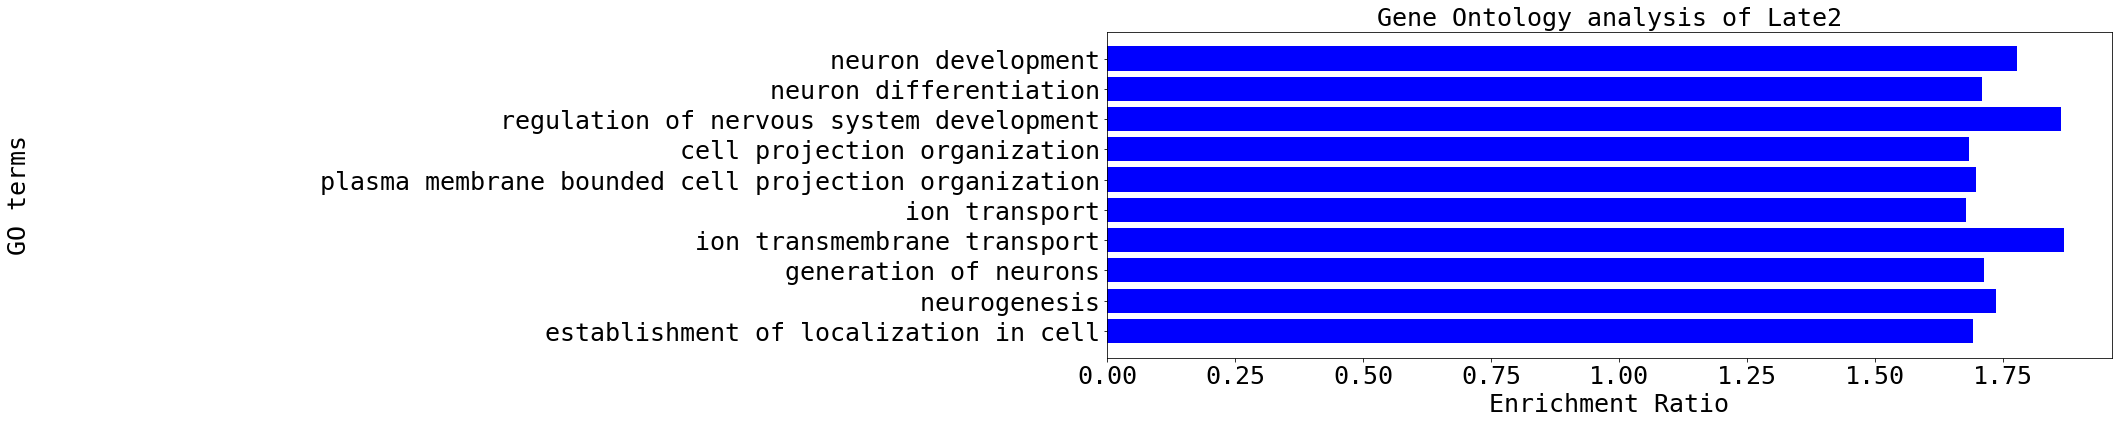

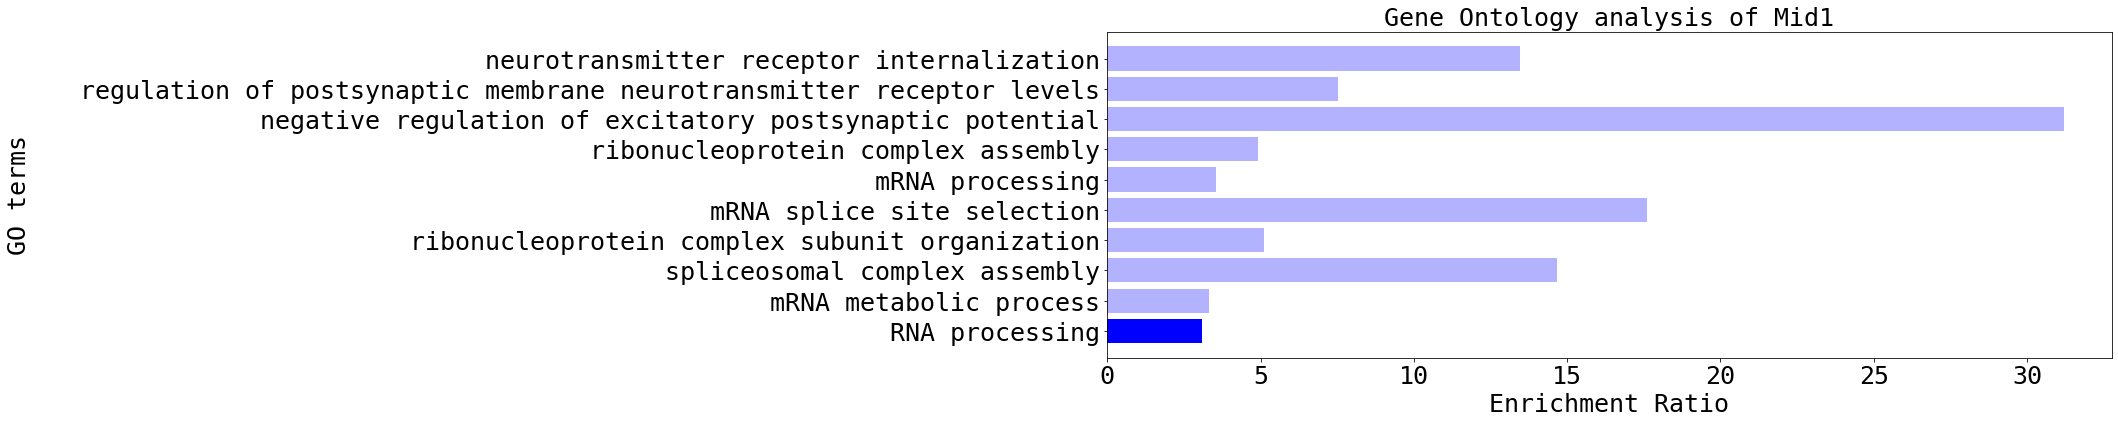

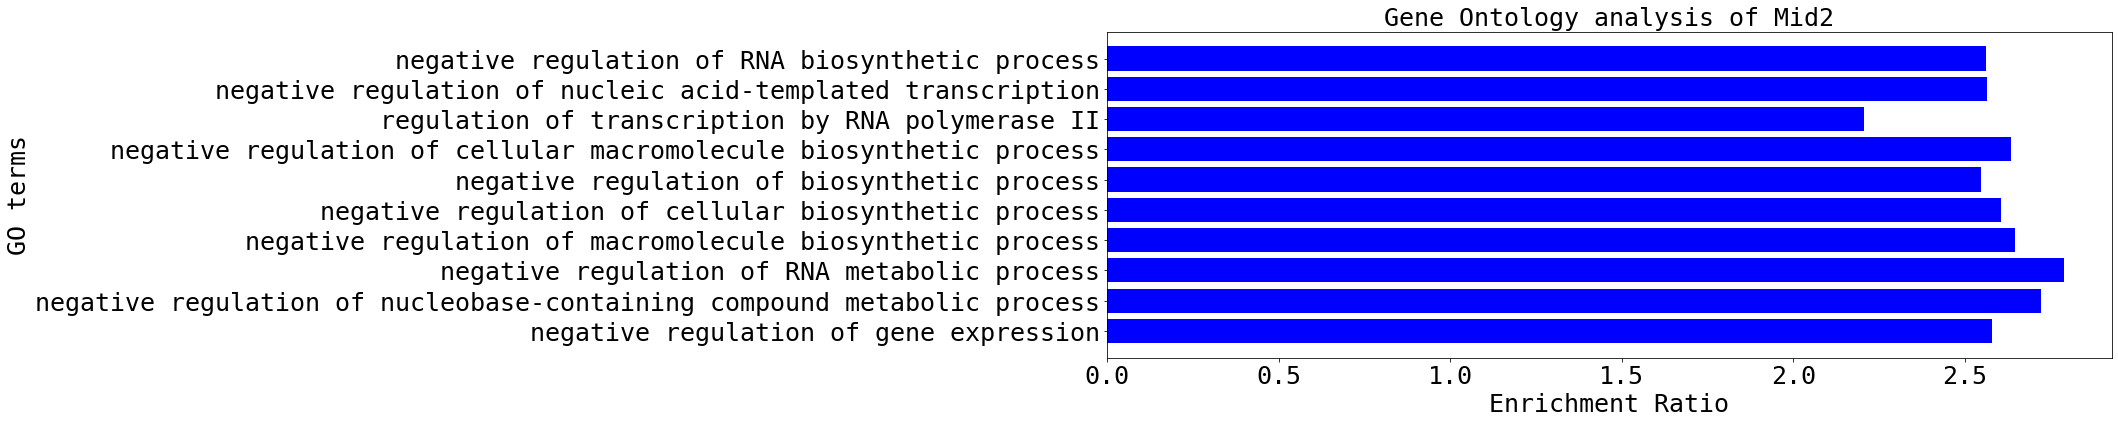

In [67]:
GO_dfs = []
groups = ["Late1", "Late2", "Mid1", "Mid2"]
import glob
for group in groups:
    GO_dfs.append(pd.read_csv(glob.glob("%s_modules/enrichment_results_wg_*.txt" % group)[0], sep = "\t"))
    
max_len = 0
for df in GO_dfs:
    for term in df["description"]:
        max_len = len(term) if len(term) > max_len else max_len

for ind, df in enumerate(GO_dfs):        
    new_index = [(max_len - len(term)) * " " + term for term in df["description"]]
    plt.figure(figsize = (18,6))
    plt.rcParams["font.family"] = "DejaVu Sans Mono"
    plt.rc('xtick',labelsize=25)
    plt.rc('ytick',labelsize=25)
    plt.barh(new_index, df["enrichmentRatio"], color = [(0,0,1,1) if fdr < 0.05 else (0,0,1, 0.3) for fdr in df["FDR"]])
    plt.title('Gene Ontology analysis of %s' % groups[ind], fontsize=25)
    plt.ylabel('GO terms', fontsize=25)
    plt.xlabel('Enrichment Ratio', fontsize=25)
    # plt.yticks(df_late1["description"], label, fontsize=13, rotation=0)

    plt.show()

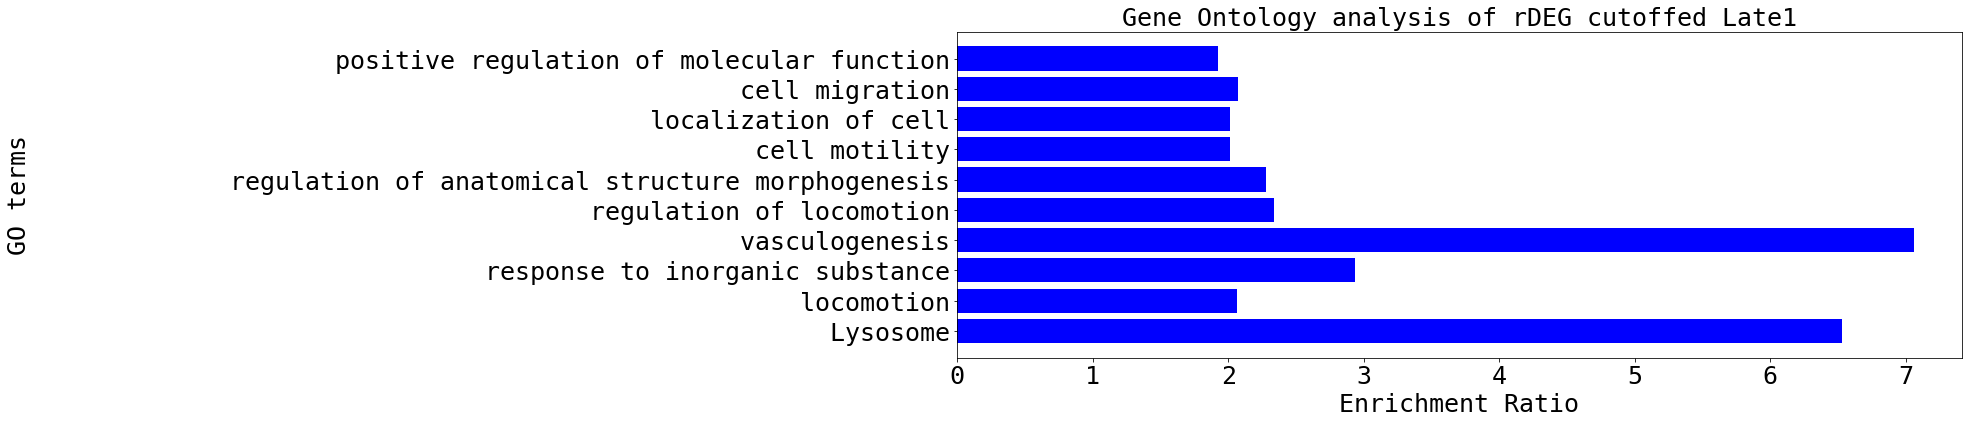

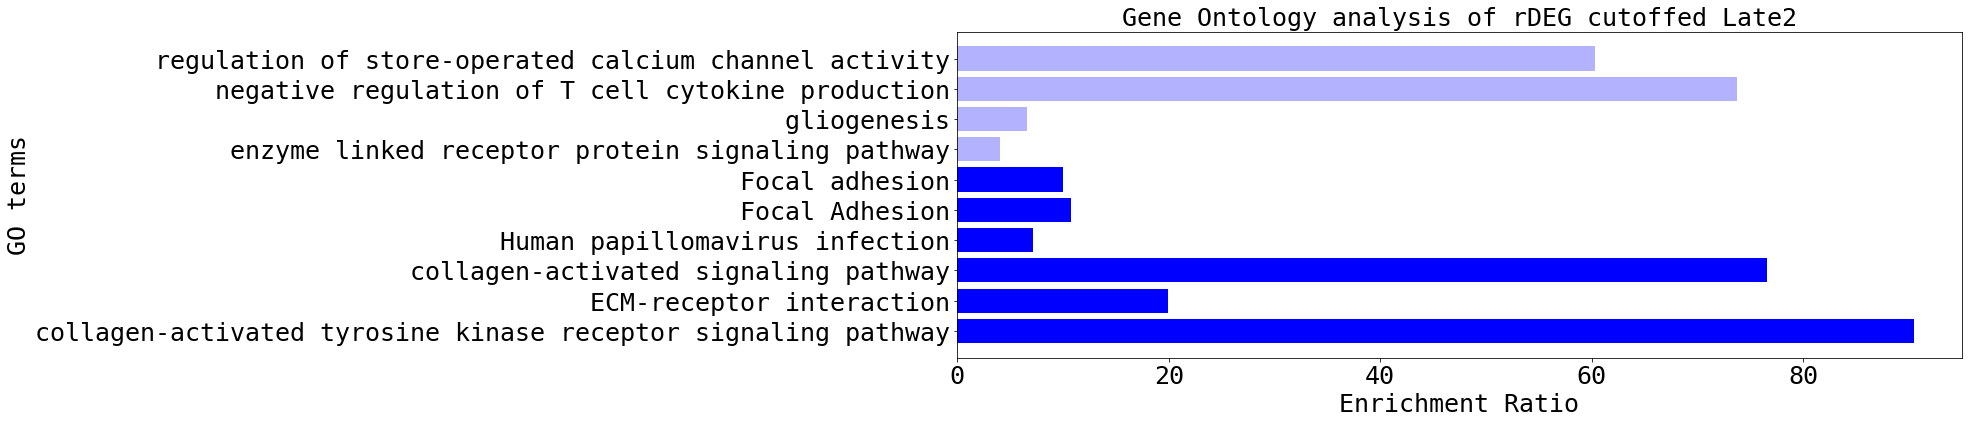

In [69]:
GO_dfs = []
groups = ["rLate1", "rLate2"]
import glob
for group in groups:
    GO_dfs.append(pd.read_csv(glob.glob("%s_modules/enrichment_results_wg_*.txt" % group)[0], sep = "\t"))
    
max_len = 0
for df in GO_dfs:
    for term in df["description"]:
        max_len = len(term) if len(term) > max_len else max_len
groups = ["rDEG cutoffed Late1", "rDEG cutoffed Late2"]
for ind, df in enumerate(GO_dfs):        
    new_index = [(max_len - len(term)) * " " + term for term in df["description"]]
    plt.figure(figsize = (18,6))
    plt.rcParams["font.family"] = "DejaVu Sans Mono"
    plt.rc('xtick',labelsize=25)
    plt.rc('ytick',labelsize=25)
    plt.barh(new_index, df["enrichmentRatio"], color = [(0,0,1,1) if fdr < 0.05 else (0,0,1, 0.3) for fdr in df["FDR"]])
    plt.title('Gene Ontology analysis of %s' % groups[ind], fontsize=25)
    plt.ylabel('GO terms', fontsize=25)
    plt.xlabel('Enrichment Ratio', fontsize=25)
    # plt.yticks(df_late1["description"], label, fontsize=13, rotation=0)

    plt.show()

# Correlation pattern in groups (Fig. 4)

In [ ]:
## Chord requires license
from chord import Chord

In [71]:
Late2_modules  = ["MEhoneydew1", "MEmaroon", "MEorangered4", "MEdarkorange", "MEcoral2", "MEthistle1", "MEgreenyellow", "MEskyblue3", "MEplum1"]
Mid2_modules  = ["MEdarkseagreen3", "MEthistle4", "MElightcoral", "MEnavajowhite2"]
Late1_modules  = ["MEtan", "MEpink", "MEcyan", "MEpurple", "MEmidnightblue", "MEbisque4", "MEbrown"] # "MEnavajowhite", "MEnavajowhite1", 
Mid1_modules  = ["MEorange", "MEorangered3"]


In [ ]:
color =[]
color.extend(["#d72631" for modules in Late2_modules]) 
color.extend(["#a2d5c6" for modules in Late1_modules]) 
color.extend(["#077b8a" for modules in Mid1_modules]) 
color.extend(["#5c3c92" for modules in Mid2_modules]) 

scope = Late2_modules + Late1_modules + Mid1_modules + Mid2_modules
cor_arr = abs(np.clip(1-df_MEDiss.loc[scope][scope].to_numpy(),-1, 0 ))
cor_arr[cor_arr < 0.98] = 0

Chord(cor_arr.tolist(),
     [s[2:] for s in scope], colors=color,
      divide=True, divide_idx=len(Late1_modules + Late2_modules),
     divide_left_label="Mid", divide_right_label="Late",
     margin=160).show_png()#.to_html()

# plot = chord.Chord(matrix, names).to_html()

from IPython.display import IFrame
IFrame(src="./out.html", width=700, height=700)